In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
df = pd.read_csv('train.csv')


In [94]:
df_test = pd.read_csv('test.csv')

In [95]:
df.head()

ApplicationDate   Age  AnnualIncome  CreditScore  LoanAmount  LoanDuration  \
0      2010-06-26  27.0       66829.0        549.0     17290.0          60.0   
1      1996-09-23  55.0      172147.0        850.0     16110.0          36.0   
2      2015-01-19  51.0      300000.0        850.0     38436.0          36.0   
3      1981-05-12  25.0       34683.0        847.0     19186.0          48.0   
4      1995-05-07  55.0      300000.0        850.0     30437.0          48.0   

  MaritalStatus  NumberOfDependents HomeOwnershipStatus  MonthlyDebtPayments  \
0      Divorced                 1.0                Rent               1095.0   
1       Widowed                 1.0            Mortgage                211.0   
2       Married                 0.0            Mortgage                546.0   
3       Married                 0.0               Other                153.0   
4        Single                 2.0                Rent                562.0   

   ...  EmploymentStatus  EducationLevel  Experience  NetWorth  \
0  ...          Employed       Associate         4.0   35067.0   
1  ...          Employed     High School        33.0   27001.0   
2  ...          Employed        Bachelor        28.0  278382.0   
3  ...          Employed     High School         0.0    9224.0   
4  ...          Employed        Bachelor        31.0    4502.0   

   BaseInterestRate InterestRate  MonthlyLoanPayment  TotalDebtToIncomeRatio  \
0          0.257790     0.251465          508.970230                0.288013   
1          0.086110     0.093173          514.675859                0.050585   
2          0.108436     0.115443         1268.276385                0.072571   
3          0.100686     0.112822          498.505187                0.225415   
4          0.110437     0.089037          756.035156                0.052721   

   LoanApproved  RiskScore  
0           0.0  66.176500  
1           1.0  28.495737  
2           1.0  34.488104  
3           1.0  36.910753  
4           1.0  31.347091  

[5 rows x 36 columns]

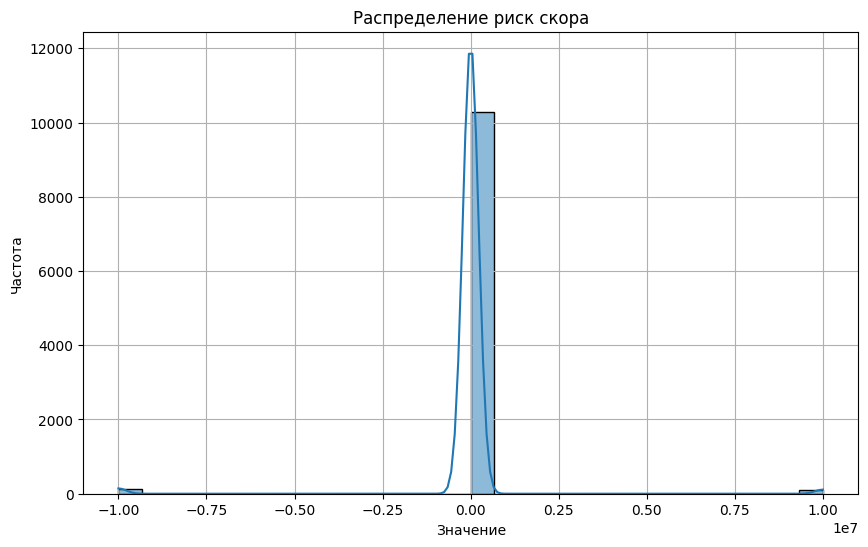

In [96]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='RiskScore', bins=30, kde=True)
plt.title('Распределение риск скора')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

По распределению целевой переменной можно сделать выводы о выбросах.

In [97]:
max_risk_score = df['RiskScore'].max()
min_risk_score = df['RiskScore'].min()

In [98]:
len(df[df['RiskScore'] > 100]) == len(df[df['RiskScore'] == max_risk_score])

True

In [99]:
len(df[df['RiskScore'] < -100]) == len(df[df['RiskScore'] == min_risk_score])

True

Видно, что все данные вне диапазона от -100 до 100 одинаковы и имеют минимальные и максимальные значения соответственно, из чего можно сделать вывод что они являются выбросами

In [100]:
df = df[df['RiskScore'] >= -100]
df = df[df['RiskScore'] <= 100]

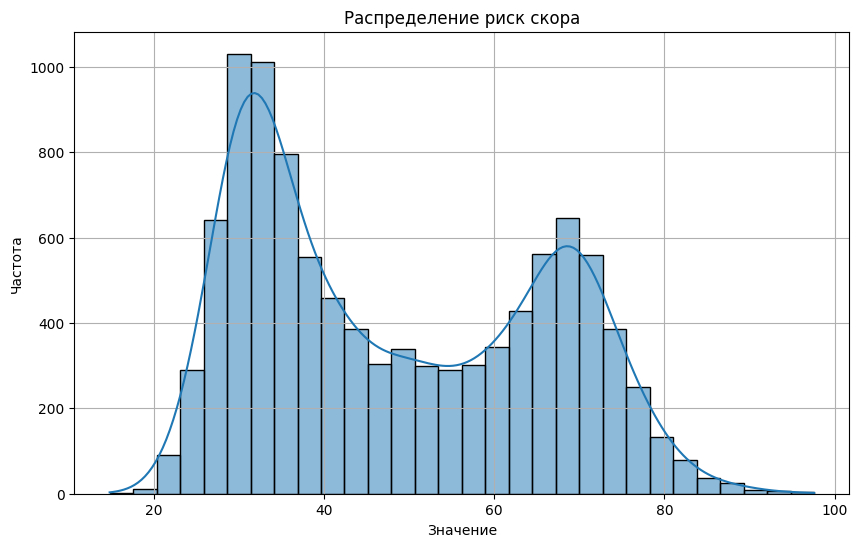

In [101]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='RiskScore', bins=30, kde=True)
plt.title('Распределение риск скора')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

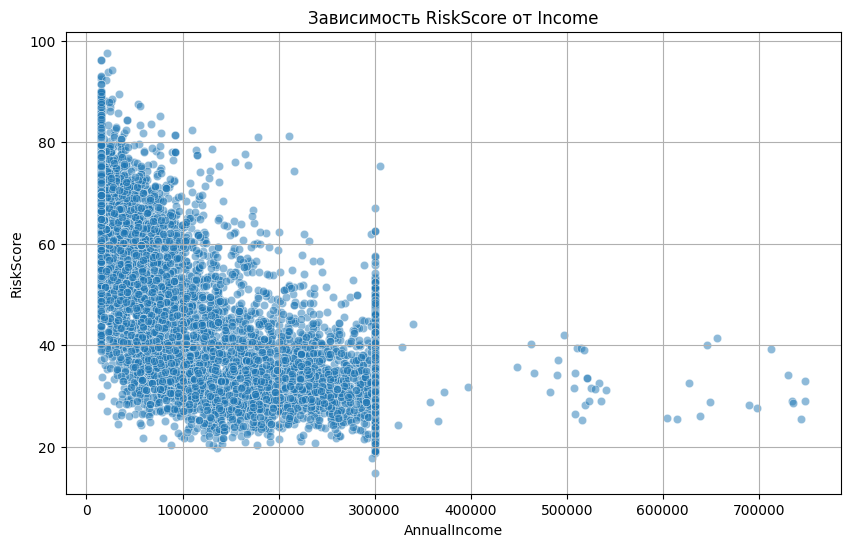

In [102]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='RiskScore', data=df, alpha=0.5)
plt.title('Зависимость RiskScore от Income')
plt.xlabel('AnnualIncome')
plt.ylabel('RiskScore')
plt.grid(True)
plt.show()

In [103]:
# Количество пропусков в каждом столбце
missing_per_column = df.isnull().sum()
print("Пропуски по столбцам:")
print(missing_per_column)

Пропуски по столбцам:
ApplicationDate                 0
Age                             0
AnnualIncome                    0
CreditScore                   485
LoanAmount                    485
LoanDuration                    0
MaritalStatus                   0
NumberOfDependents              0
HomeOwnershipStatus             0
MonthlyDebtPayments           485
CreditCardUtilizationRate       0
NumberOfOpenCreditLines         0
NumberOfCreditInquiries         0
DebtToIncomeRatio               0
BankruptcyHistory             485
LoanPurpose                   485
PreviousLoanDefaults            0
PaymentHistory                  0
LengthOfCreditHistory           0
SavingsAccountBalance           0
CheckingAccountBalance        485
TotalAssets                   485
TotalLiabilities                0
MonthlyIncome                   0
UtilityBillsPaymentHistory      0
JobTenure                       0
EmploymentStatus                0
EducationLevel                  0
Experience                

In [104]:
rows_with_missing = df[df.isnull().any(axis=1)]
print(f"Найдено строк с пропусками: {len(rows_with_missing)}")
rows_with_missing.head()

Найдено строк с пропусками: 485


ApplicationDate   Age  AnnualIncome  CreditScore  LoanAmount  LoanDuration  \
13      1997-02-26  27.0       15000.0          NaN         NaN          48.0   
17      2009-06-11  43.0       43876.0          NaN         NaN          24.0   
25      1983-12-01  56.0       15000.0          NaN         NaN          12.0   
80      2019-07-05  44.0      136297.0          NaN         NaN          36.0   
95      2011-03-06  23.0      203619.0          NaN         NaN          24.0   

   MaritalStatus  NumberOfDependents HomeOwnershipStatus  MonthlyDebtPayments  \
13       Married                 5.0               Other                  NaN   
17       Married                 3.0            Mortgage                  NaN   
25       Married                 1.0                 Own                  NaN   
80        Single                 0.0                Rent                  NaN   
95      Divorced                 0.0            Mortgage                  NaN   

    ...  EmploymentStatus  EducationLevel  Experience  NetWorth  \
13  ...          Employed     High School         5.0       NaN   
17  ...          Employed       Associate        20.0       NaN   
25  ...          Employed        Bachelor        34.0       NaN   
80  ...          Employed     High School        24.0       NaN   
95  ...          Employed       Associate         0.0       NaN   

    BaseInterestRate InterestRate  MonthlyLoanPayment  TotalDebtToIncomeRatio  \
13               NaN     0.343139         1097.352250                1.293082   
17               NaN     0.109708         1694.354520                0.657586   
25               NaN     0.218868          822.309410                1.221048   
80               NaN     0.208675         1526.095455                0.245736   
95               NaN     0.124805          815.846517                0.098233   

    LoanApproved  RiskScore  
13           0.0  67.304719  
17           0.0  48.636125  
25           0.0  70.406884  
80           1.0  37.218934  
95           1.0  38.026142  

[5 rows x 36 columns]

In [105]:
rows_with_missing = df_test[df_test.isnull().any(axis=1)]
print(f"Найдено строк с пропусками: {len(rows_with_missing)}")
rows_with_missing.head()

Найдено строк с пропусками: 0


Empty DataFrame
Columns: [ID, ApplicationDate, Age, AnnualIncome, CreditScore, LoanAmount, LoanDuration, MaritalStatus, NumberOfDependents, HomeOwnershipStatus, MonthlyDebtPayments, CreditCardUtilizationRate, NumberOfOpenCreditLines, NumberOfCreditInquiries, DebtToIncomeRatio, BankruptcyHistory, LoanPurpose, PreviousLoanDefaults, PaymentHistory, LengthOfCreditHistory, SavingsAccountBalance, CheckingAccountBalance, TotalAssets, TotalLiabilities, MonthlyIncome, UtilityBillsPaymentHistory, JobTenure, EmploymentStatus, EducationLevel, Experience, NetWorth, BaseInterestRate, InterestRate, MonthlyLoanPayment, TotalDebtToIncomeRatio, LoanApproved]
Index: []

[0 rows x 36 columns]

В тестовых данных отсутствют строки с пропусками, поэтому принято решение не обрабатывать пропуски, а просто удалить строки с пропусками из тренировочных данных

In [106]:
df = df.dropna()

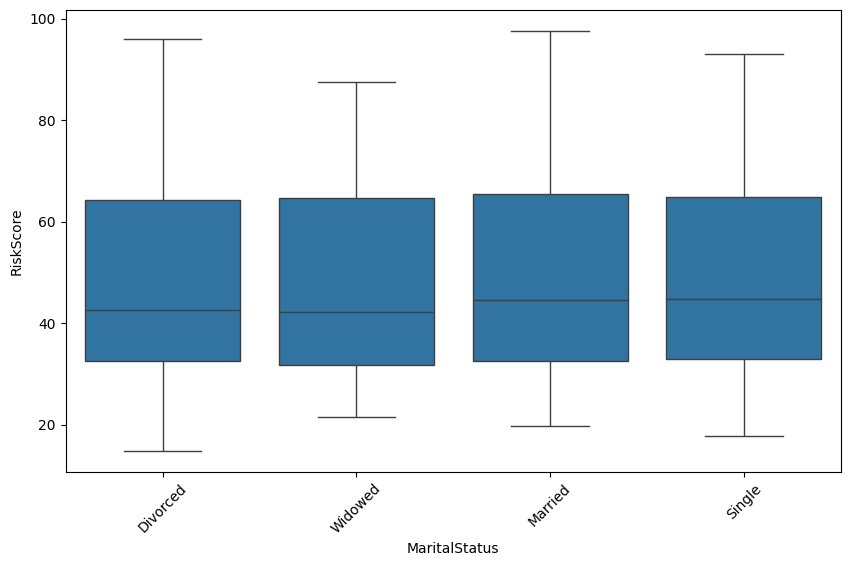

In [107]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='MaritalStatus', y='RiskScore', data=df)
plt.xticks(rotation=45)
plt.show()

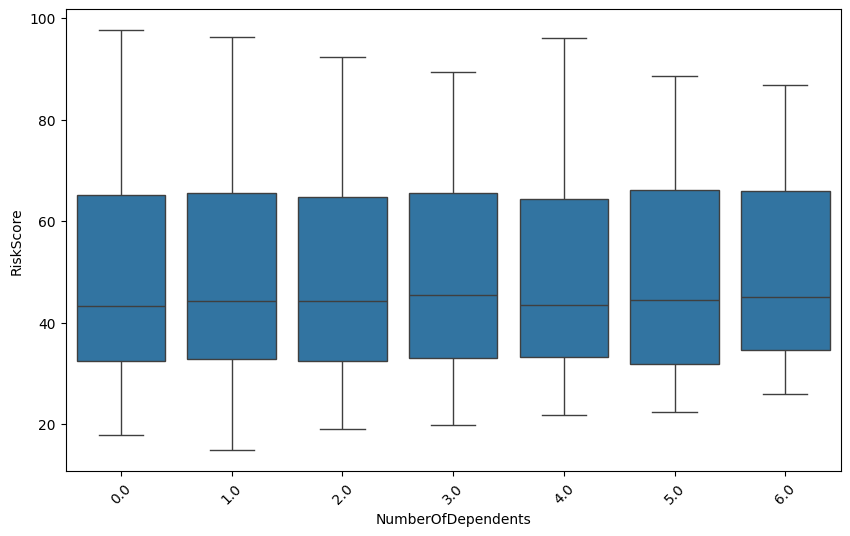

In [108]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='NumberOfDependents', y='RiskScore', data=df)
plt.xticks(rotation=45)
plt.show()

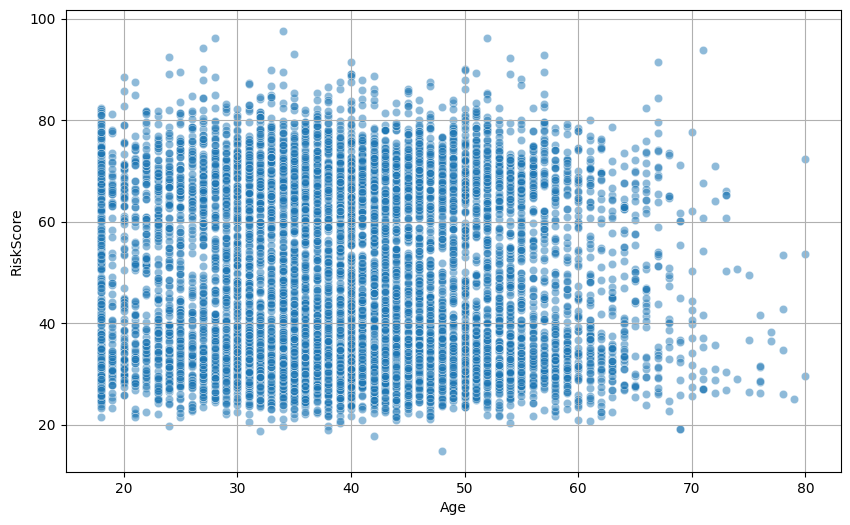

In [109]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='RiskScore', data=df, alpha=0.5)
plt.grid(True)
plt.show()

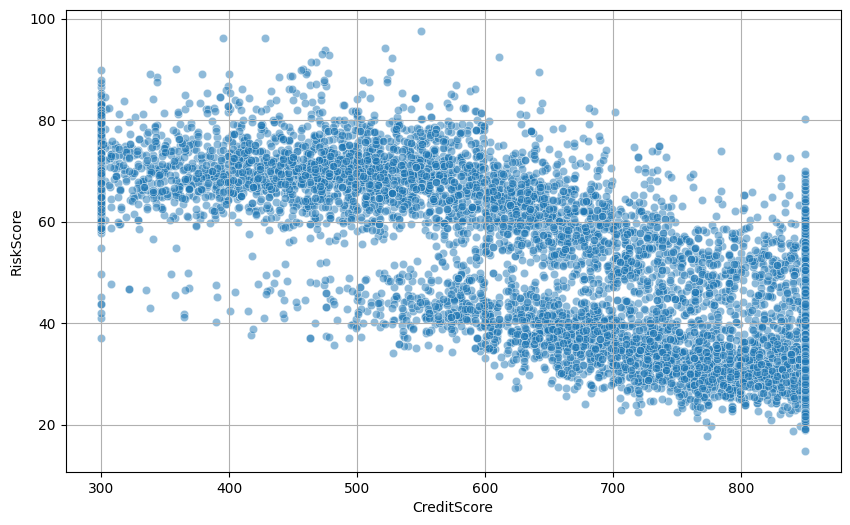

In [110]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CreditScore', y='RiskScore', data=df, alpha=0.5)
plt.grid(True)
plt.show()

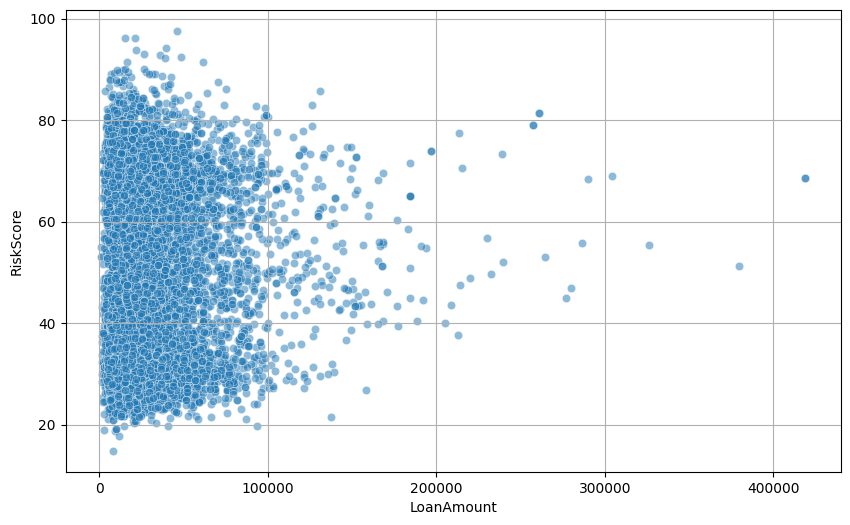

In [111]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LoanAmount', y='RiskScore', data=df, alpha=0.5)
plt.grid(True)
plt.show()

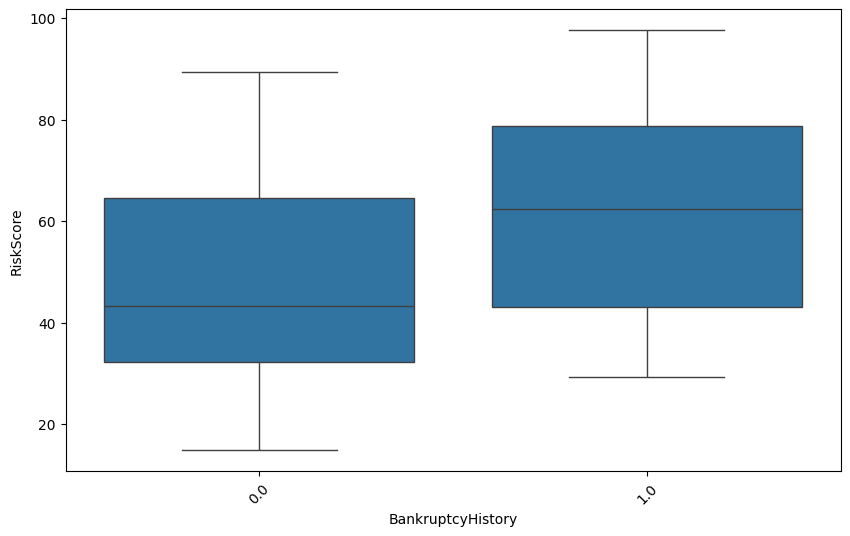

In [112]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='BankruptcyHistory', y='RiskScore', data=df)
plt.xticks(rotation=45)
plt.show()

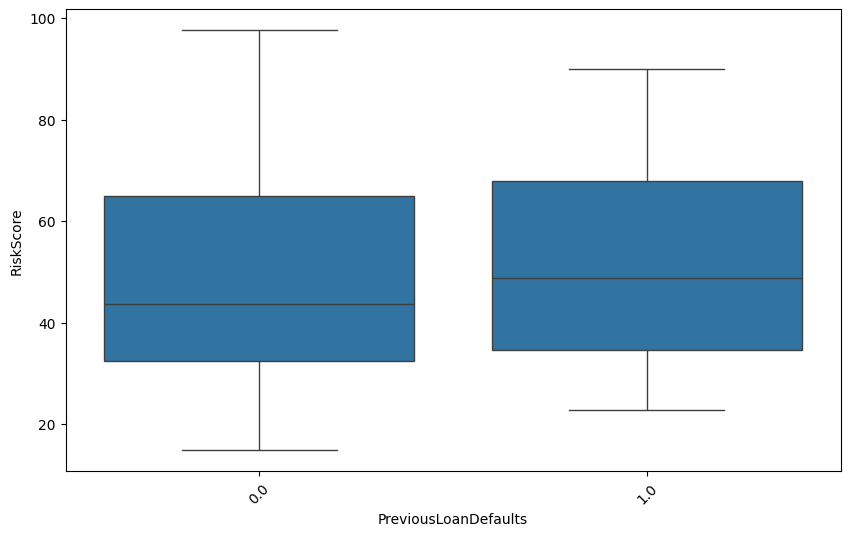

In [113]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='PreviousLoanDefaults', y='RiskScore', data=df)
plt.xticks(rotation=45)
plt.show()

In [114]:
df.describe()

Age   AnnualIncome  CreditScore     LoanAmount  LoanDuration  \
count  9787.000000    9787.000000  9787.000000    9787.000000   9787.000000   
mean     39.898743  131527.784510   677.911515   29925.122509     53.439052   
std      11.606484  116069.069481   175.374136   27812.837524     24.487196   
min      18.000000   15000.000000   300.000000    1063.000000     12.000000   
25%      32.000000   20699.500000   550.000000   12656.000000     36.000000   
50%      40.000000   88615.000000   722.000000   21836.000000     48.000000   
75%      48.000000  257780.500000   850.000000   37289.500000     60.000000   
max      80.000000  748508.000000   850.000000  418997.000000    120.000000   

       NumberOfDependents  MonthlyDebtPayments  CreditCardUtilizationRate  \
count         9787.000000          9787.000000                9787.000000   
mean             1.568714           546.437928                   0.284935   
std              1.416543           502.599753                   0.159821   
min              0.000000            13.000000                   0.003674   
25%              0.000000           233.000000                   0.159490   
50%              1.000000           398.000000                   0.262798   
75%              3.000000           683.500000                   0.391759   
max              6.000000         10879.000000                   0.914635   

       NumberOfOpenCreditLines  NumberOfCreditInquiries  ...  \
count              9787.000000              9787.000000  ...   
mean                  3.029733                 0.976704  ...   
std                   1.740653                 0.986558  ...   
min                   0.000000                 0.000000  ...   
25%                   2.000000                 0.000000  ...   
50%                   3.000000                 1.000000  ...   
75%                   4.000000                 2.000000  ...   
max                  12.000000                 6.000000  ...   

       UtilityBillsPaymentHistory    JobTenure   Experience      NetWorth  \
count                 9787.000000  9787.000000  9787.000000  9.787000e+03   
mean                     0.784073     4.938694    17.671299  1.536230e+05   
std                      0.123399     2.202112    11.336445  4.613971e+05   
min                      0.259301     0.000000     0.000000  1.004000e+03   
25%                      0.707881     3.000000     9.000000  7.253000e+03   
50%                      0.803716     5.000000    17.000000  2.724500e+04   
75%                      0.878835     6.000000    26.000000  1.239920e+05   
max                      0.996573    17.000000    57.000000  1.126117e+07   

       BaseInterestRate  InterestRate  MonthlyLoanPayment  \
count       9787.000000   9787.000000         9787.000000   
mean           0.200502      0.200155         1079.984544   
std            0.094560      0.096607         1355.683134   
min            0.052494      0.046445           30.008506   
25%            0.119862      0.119548          374.944006   
50%            0.182072      0.180496          685.742578   
75%            0.265098      0.265152         1285.051520   
max            0.722497      0.833647        29634.807816   

       TotalDebtToIncomeRatio  LoanApproved    RiskScore  
count             9787.000000   9787.000000  9787.000000  
mean                 0.519815      0.512108    48.349800  
std                  0.899259      0.499879    17.255990  
min                  0.006064      0.000000    14.841417  
25%                  0.066858      0.000000    32.699940  
50%                  0.178283      1.000000    44.151002  
75%                  0.641459      1.000000    65.122034  
max                 24.383046      1.000000    97.597249  

[8 rows x 30 columns]

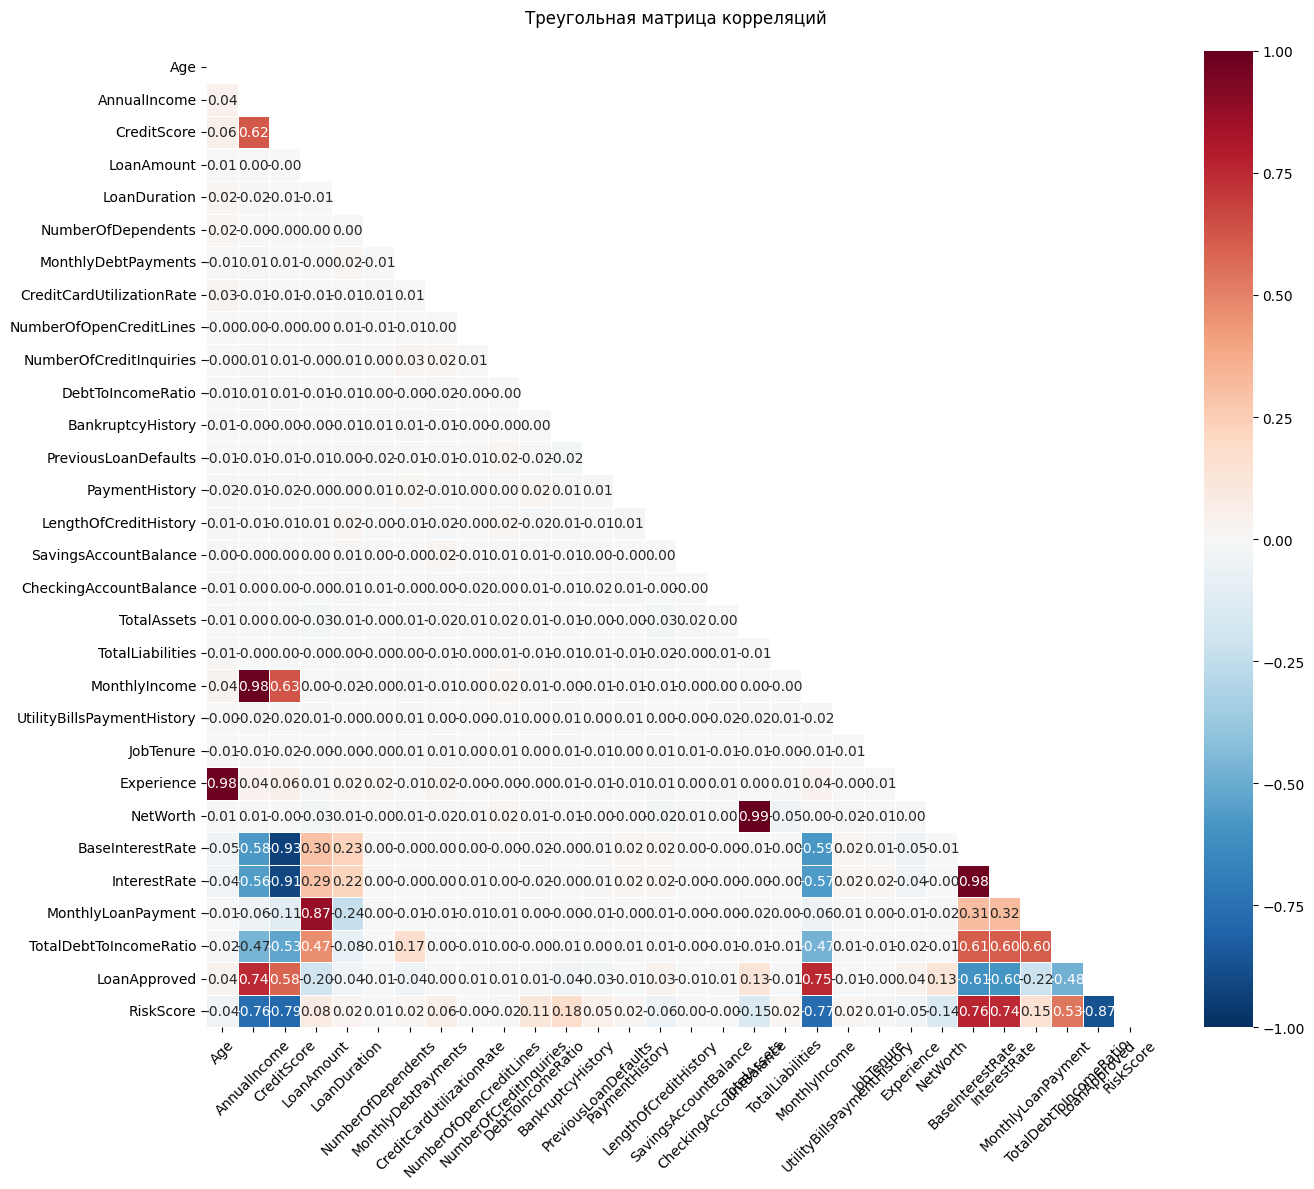

In [115]:
# Выбираем только числовые колонки
numeric_cols = df.select_dtypes(include=['number']).columns

# Вычисляем корреляции только для числовых данных
corr_matrix = df[numeric_cols].corr()

# Настраиваем визуализацию
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Скрываем верхний треугольник
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='RdBu_r',
            vmin=-1, vmax=1, center=0, linewidths=.5)
plt.title('Треугольная матрица корреляций', pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [116]:
df.dtypes

ApplicationDate                object
Age                           float64
AnnualIncome                  float64
CreditScore                   float64
LoanAmount                    float64
LoanDuration                  float64
MaritalStatus                  object
NumberOfDependents            float64
HomeOwnershipStatus            object
MonthlyDebtPayments           float64
CreditCardUtilizationRate     float64
NumberOfOpenCreditLines       float64
NumberOfCreditInquiries       float64
DebtToIncomeRatio             float64
BankruptcyHistory             float64
LoanPurpose                    object
PreviousLoanDefaults          float64
PaymentHistory                float64
LengthOfCreditHistory         float64
SavingsAccountBalance         float64
CheckingAccountBalance        float64
TotalAssets                   float64
TotalLiabilities              float64
MonthlyIncome                 float64
UtilityBillsPaymentHistory    float64
JobTenure                     float64
EmploymentStatus               object
EducationLevel                 object
Experience                    float64
NetWorth                      float64
BaseInterestRate              float64
InterestRate                  float64
MonthlyLoanPayment            float64
TotalDebtToIncomeRatio        float64
LoanApproved                  float64
RiskScore                     float64
dtype: object

In [117]:
df = df.drop('ApplicationDate', axis=1)

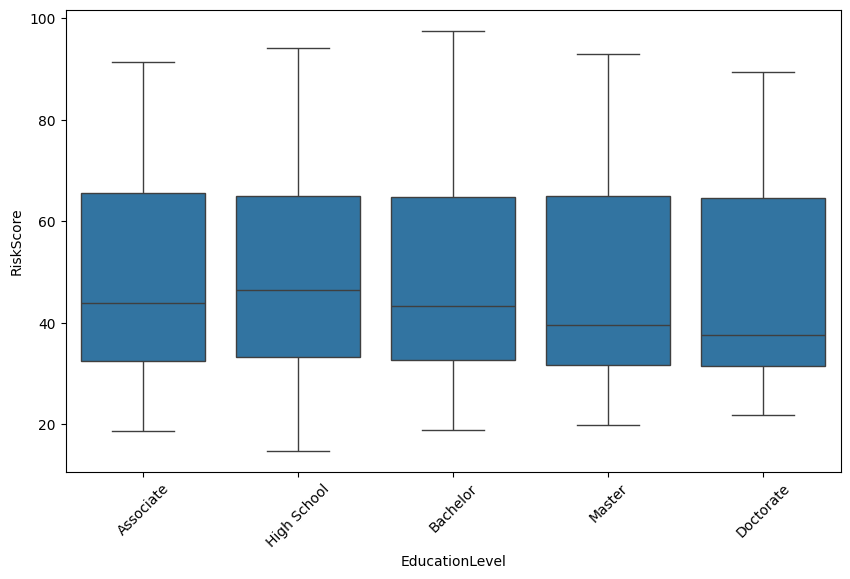

In [118]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='EducationLevel', y='RiskScore', data=df)
plt.xticks(rotation=45)
plt.show()

One-hot encoding

In [119]:
import pandas as pd

cat_cols = ['MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus', 'EducationLevel']

df = pd.get_dummies(df, columns=cat_cols, prefix=cat_cols)

print(df.head())

    Age  AnnualIncome  CreditScore  LoanAmount  LoanDuration  \
0  27.0       66829.0        549.0     17290.0          60.0   
1  55.0      172147.0        850.0     16110.0          36.0   
2  51.0      300000.0        850.0     38436.0          36.0   
3  25.0       34683.0        847.0     19186.0          48.0   
4  55.0      300000.0        850.0     30437.0          48.0   

   NumberOfDependents  MonthlyDebtPayments  CreditCardUtilizationRate  \
0                 1.0               1095.0                   0.151985   
1                 1.0                211.0                   0.175693   
2                 0.0                546.0                   0.444605   
3                 0.0                153.0                   0.188452   
4                 2.0                562.0                   0.273431   

   NumberOfOpenCreditLines  NumberOfCreditInquiries  ...  LoanPurpose_Home  \
0                      2.0                      1.0  ...             False   
1                   

In [120]:
def plot_numeric_distribution(df, column, figsize=(10, 6), bins='auto', kde=True):
    if not pd.api.types.is_numeric_dtype(df[column]):
        raise ValueError(f"Столбец '{column}' не является числовым!")

    plt.figure(figsize=figsize)
    sns.histplot(data=df, x=column, bins=bins, kde=kde, color='skyblue')

    plt.title(f'Распределение признака "{column}"', pad=20)
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

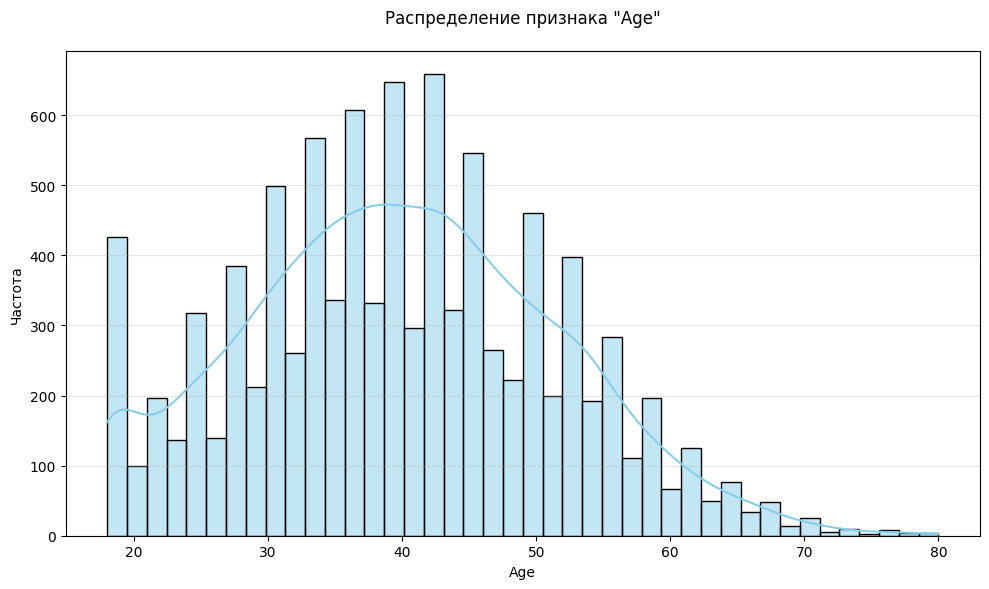

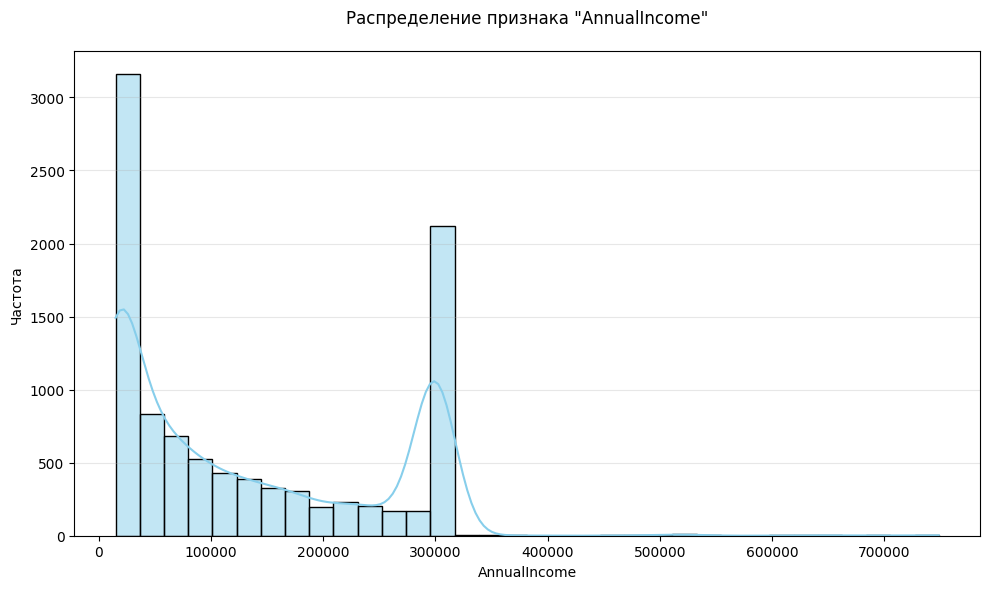

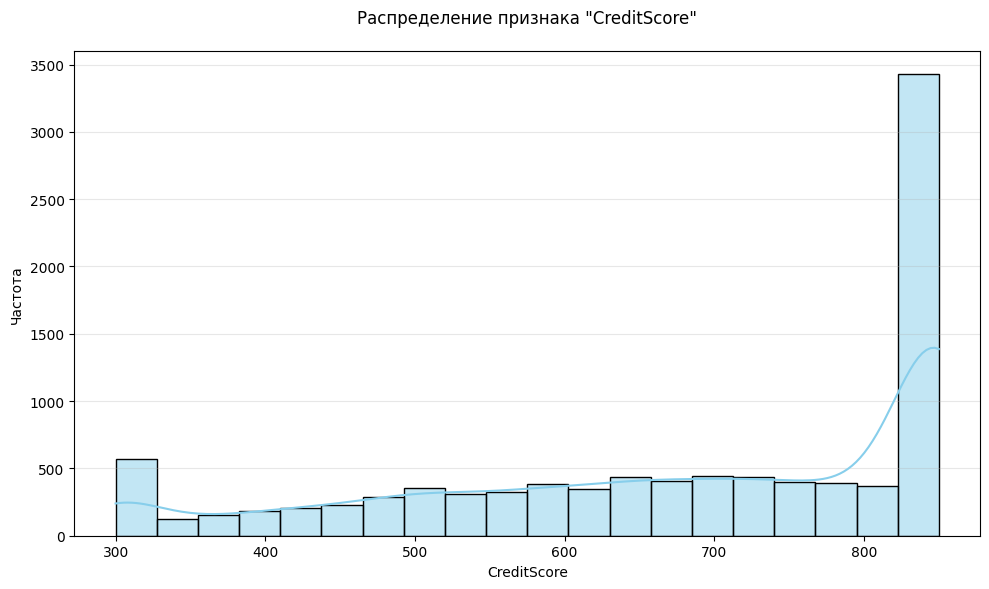

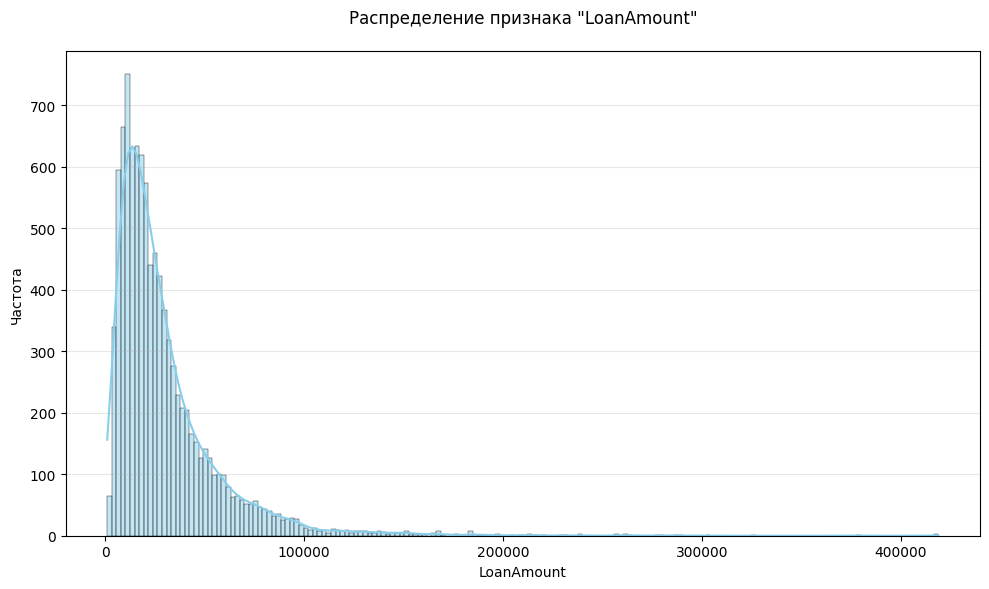

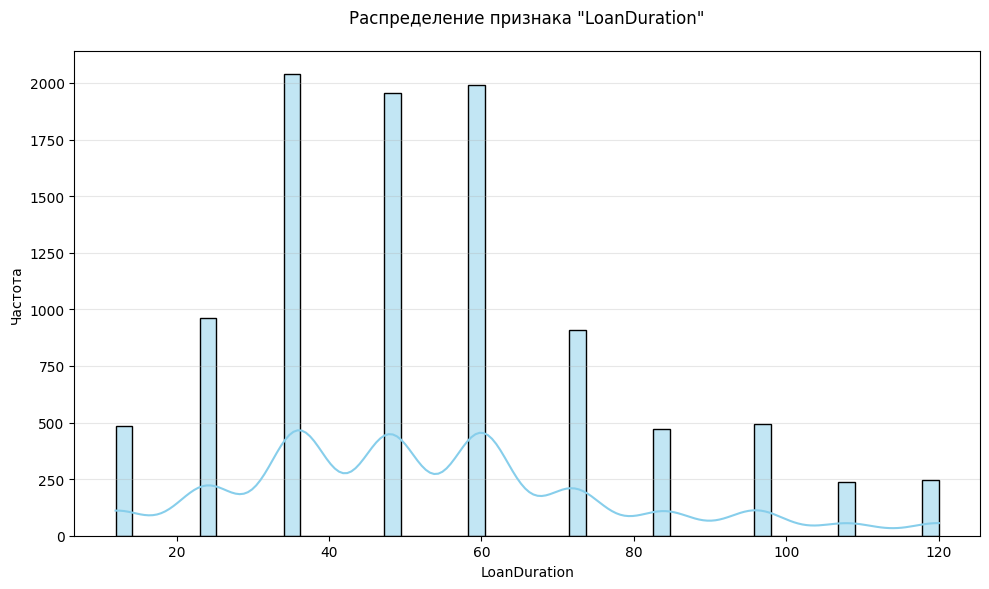

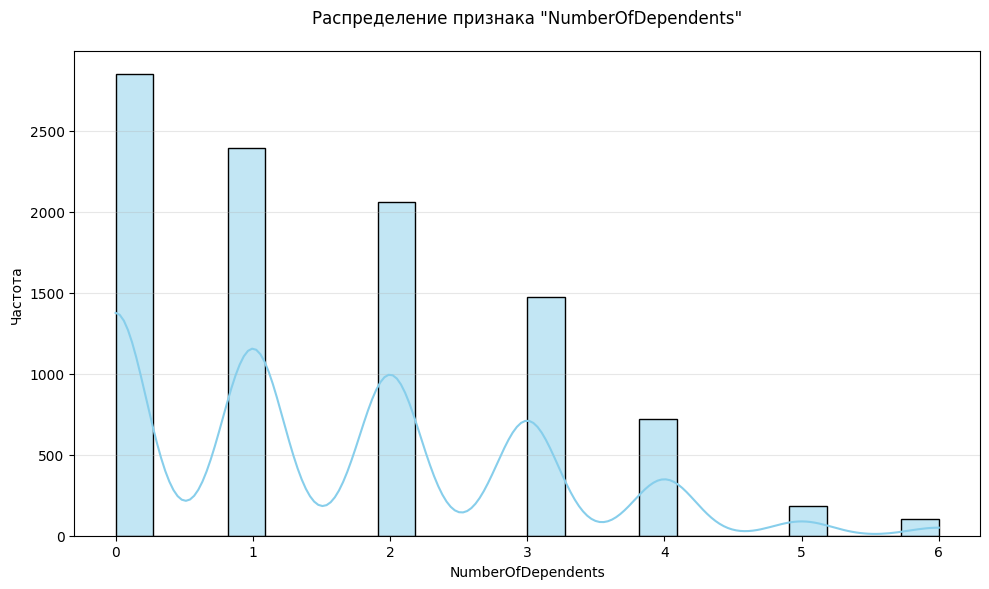

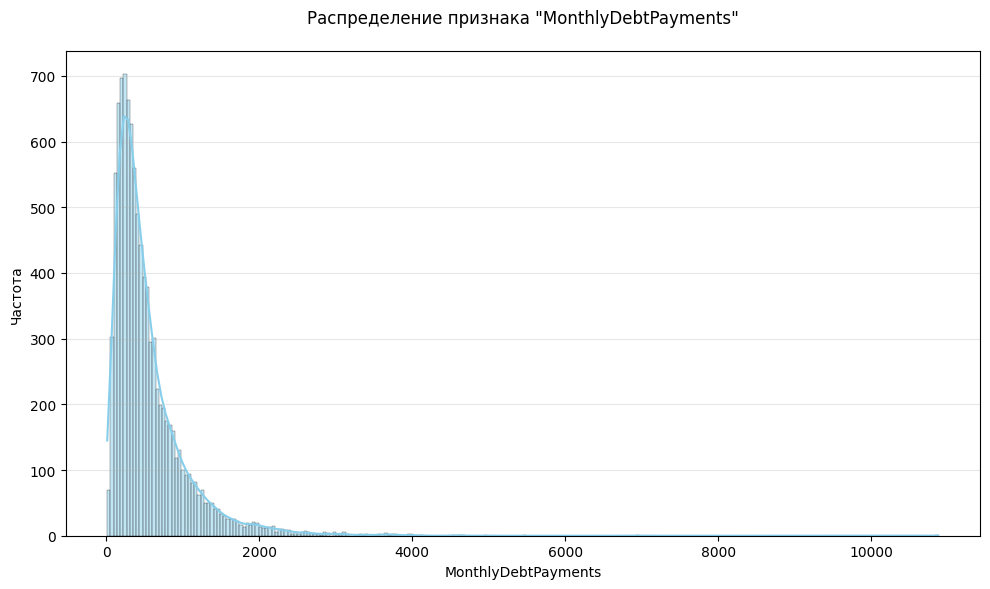

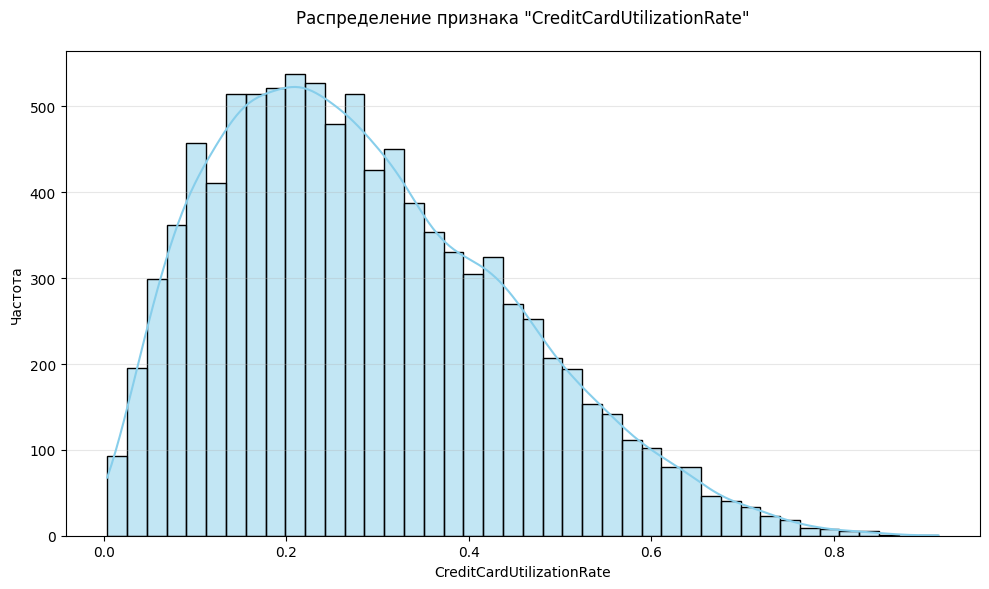

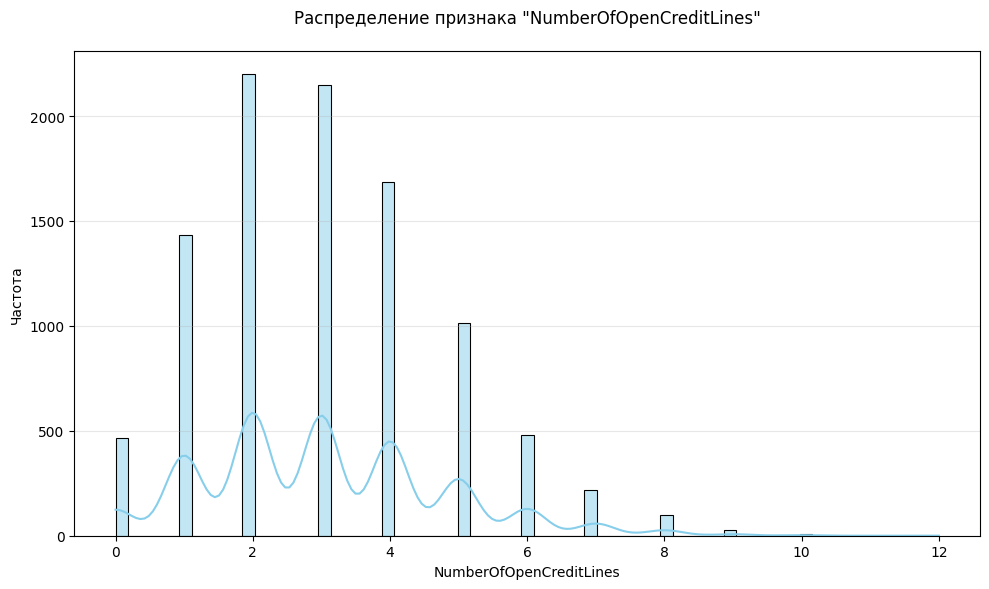

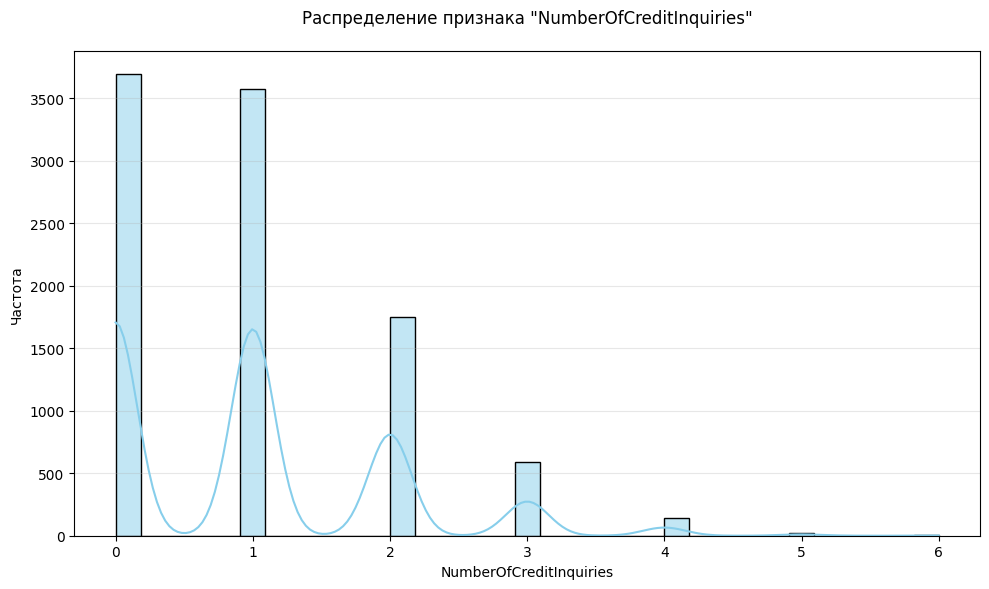

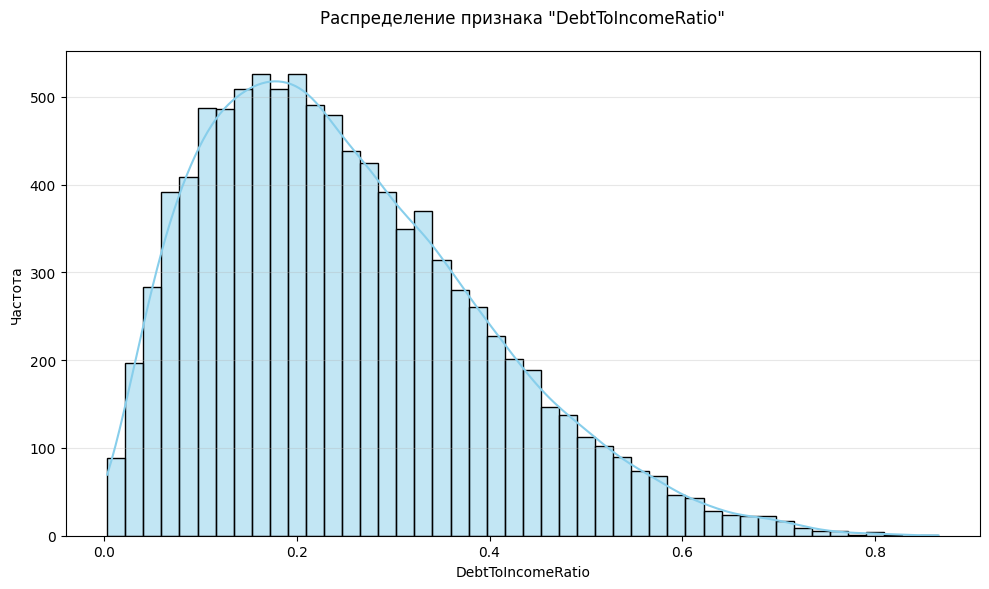

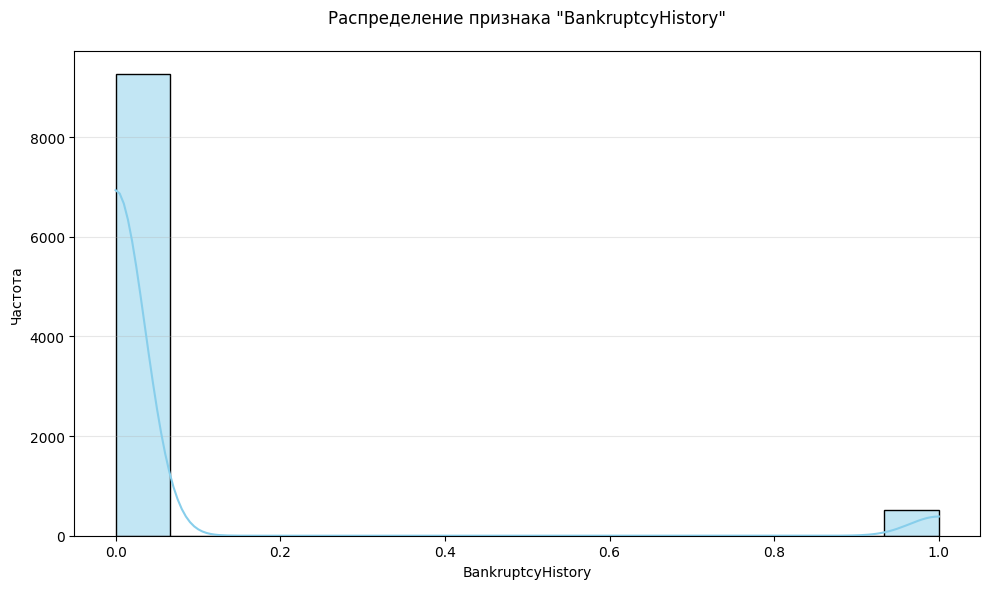

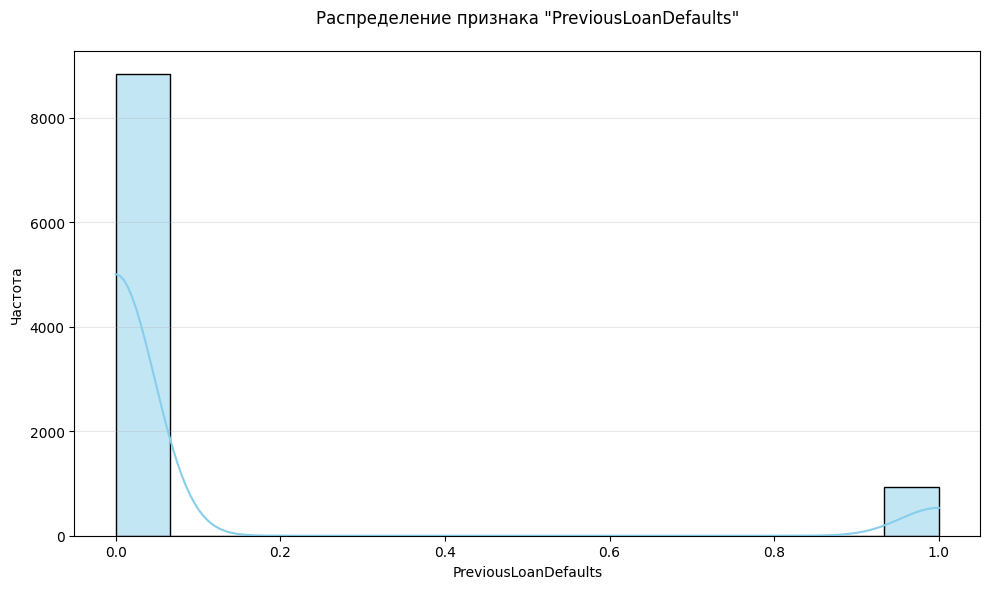

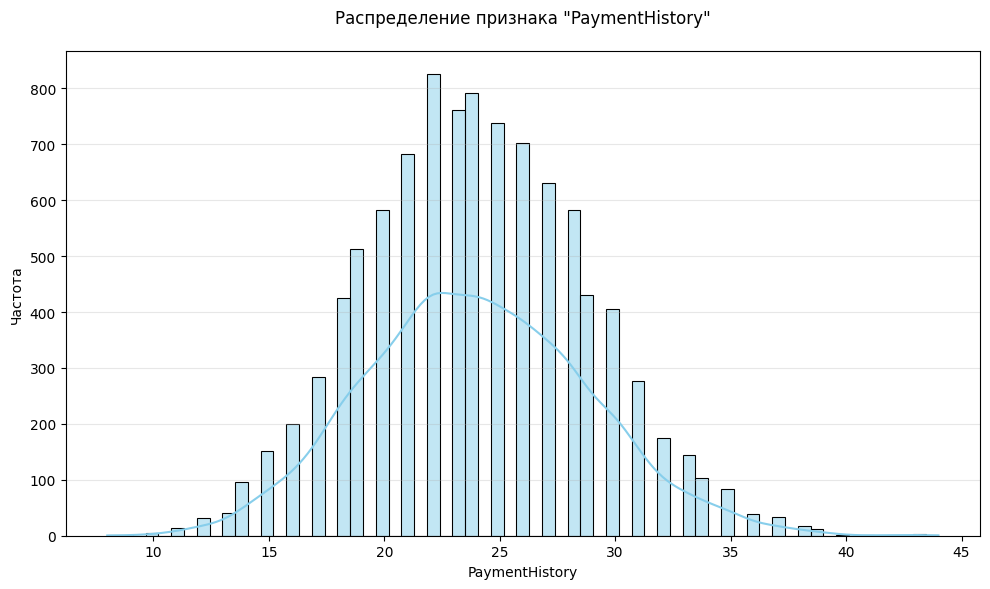

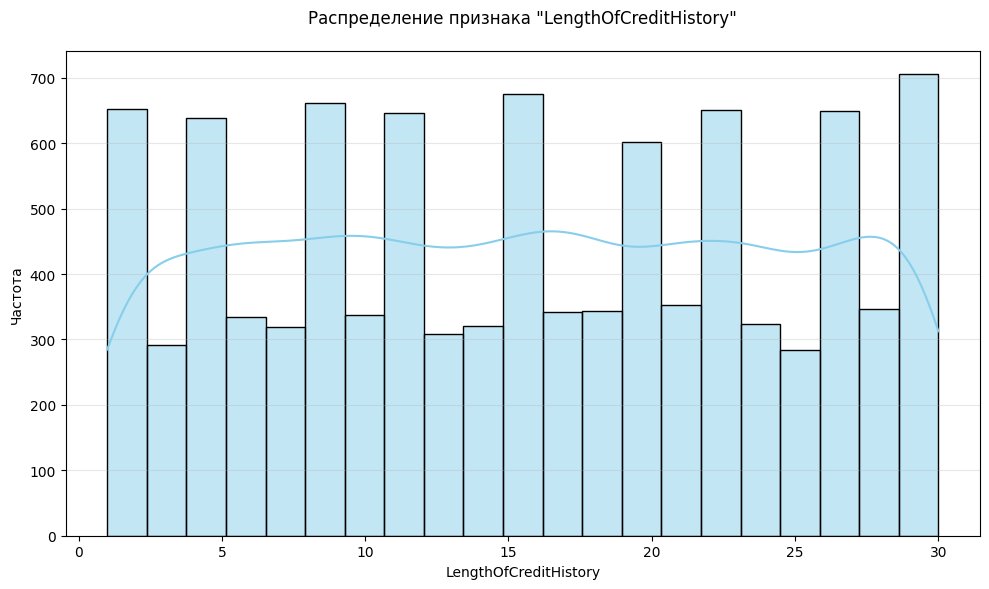

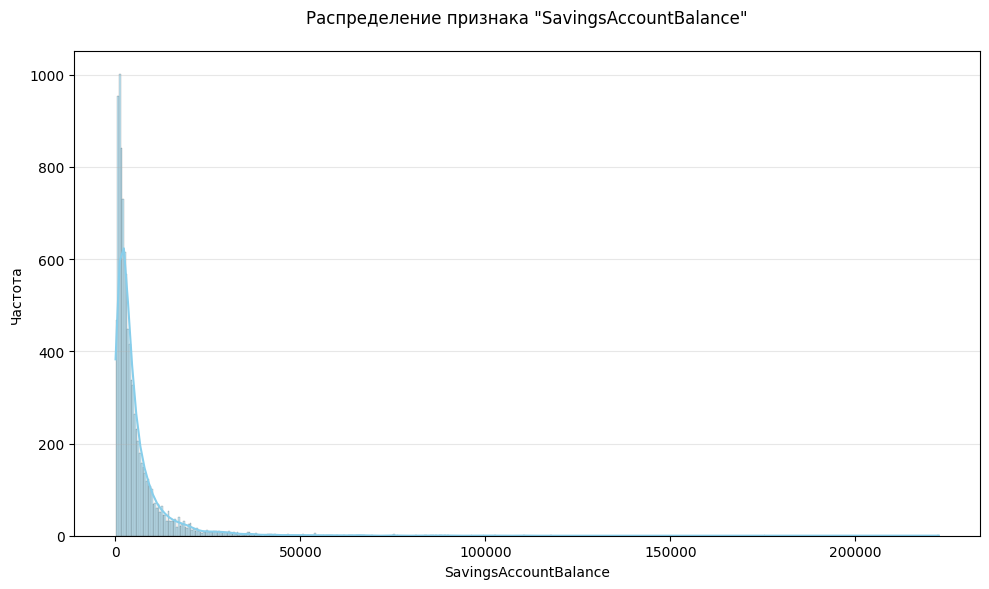

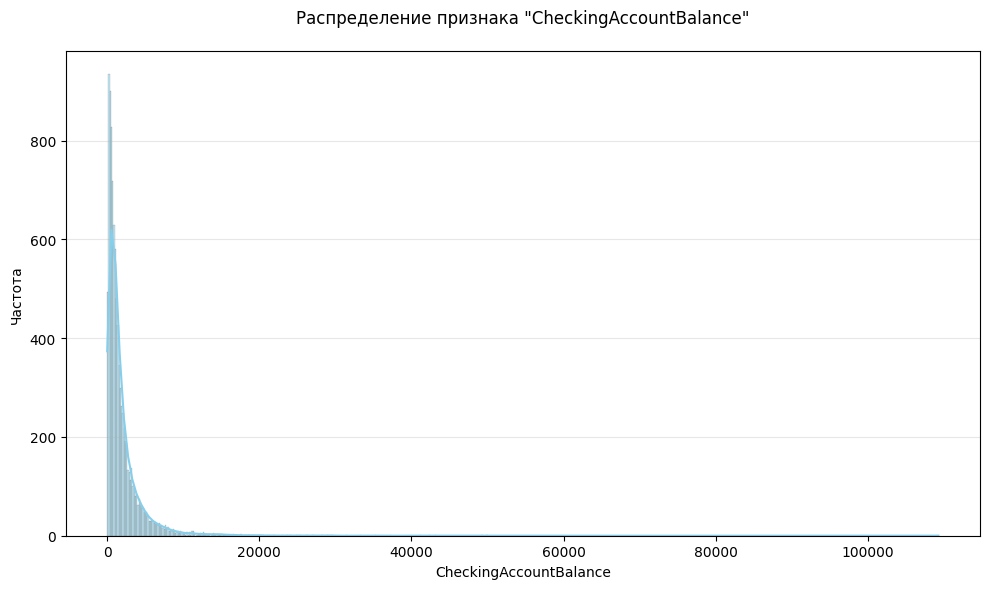

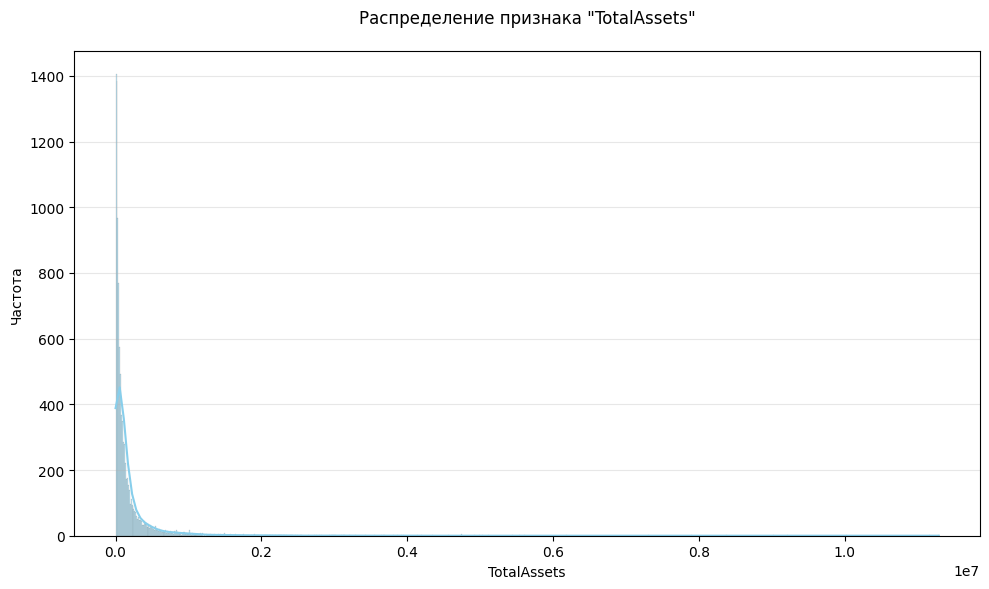

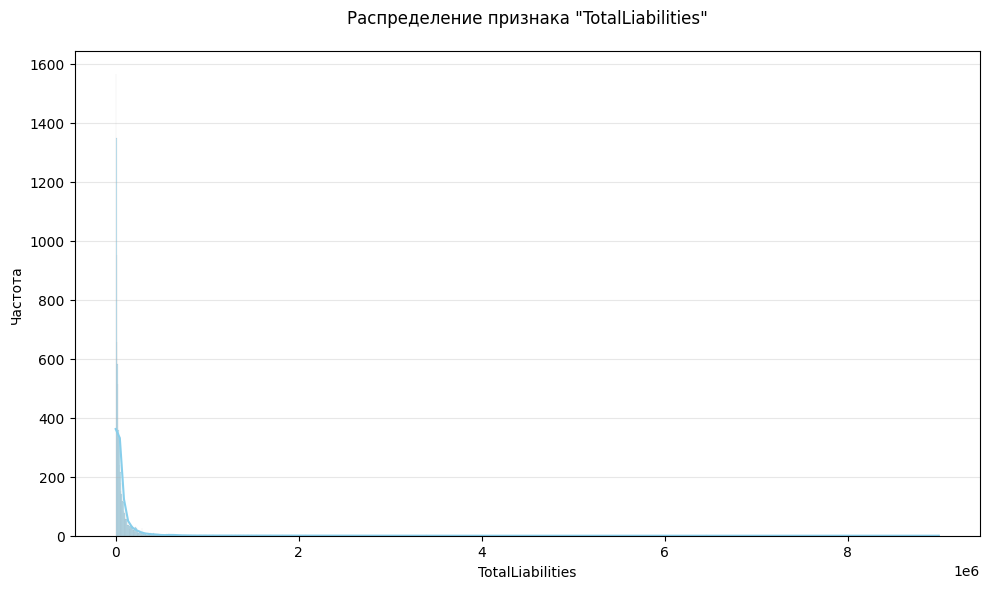

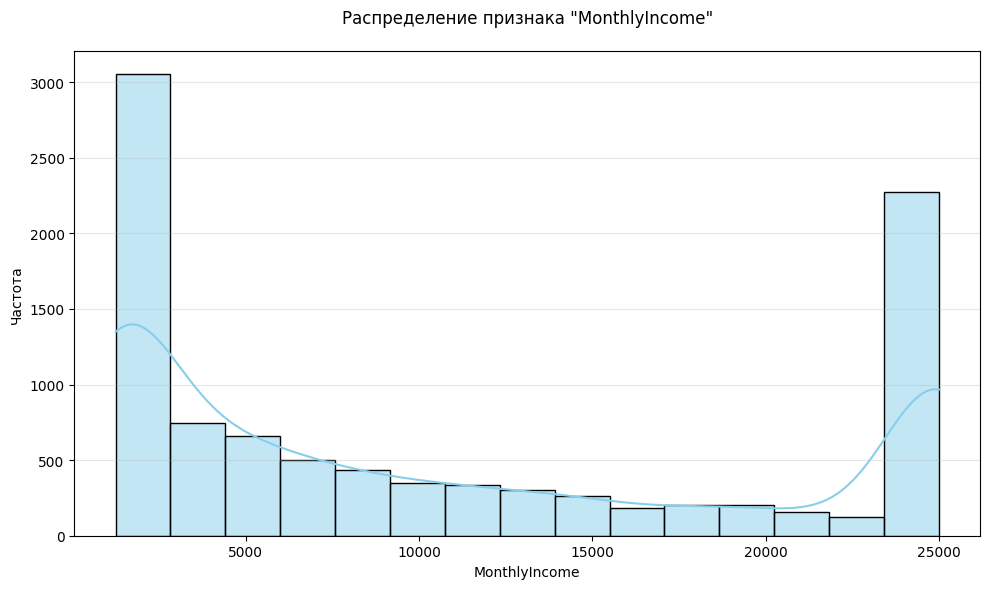

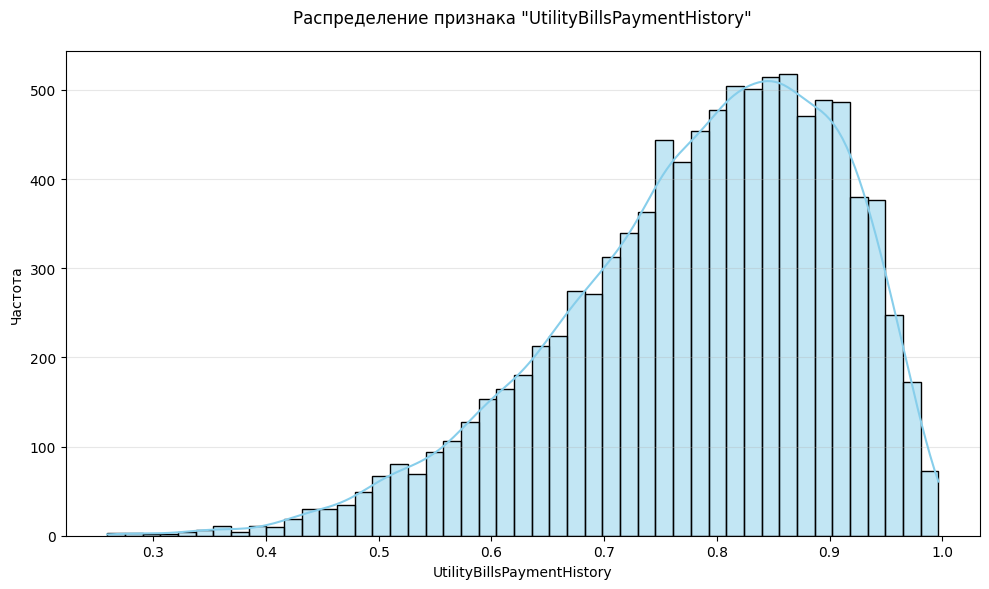

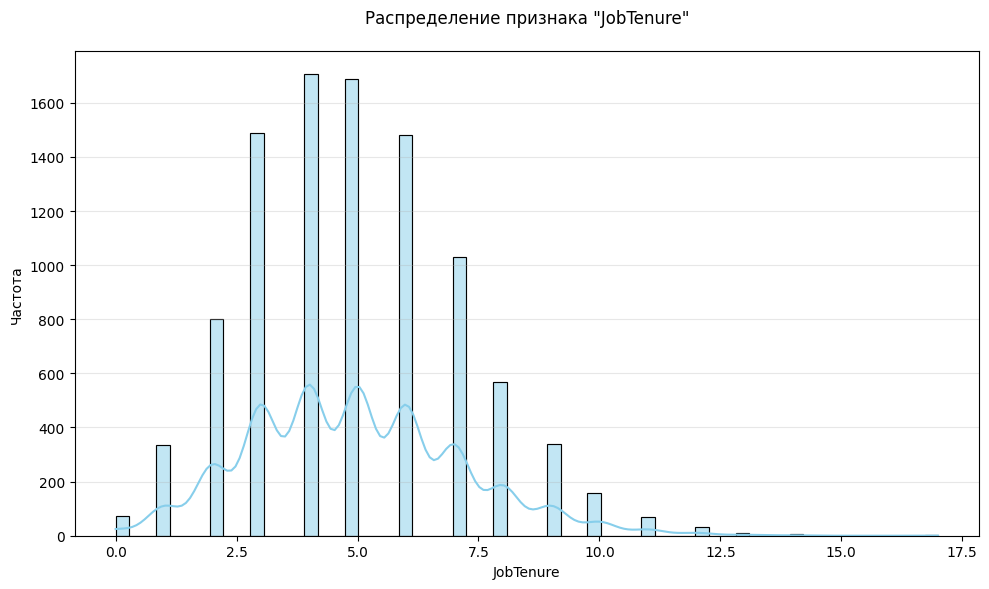

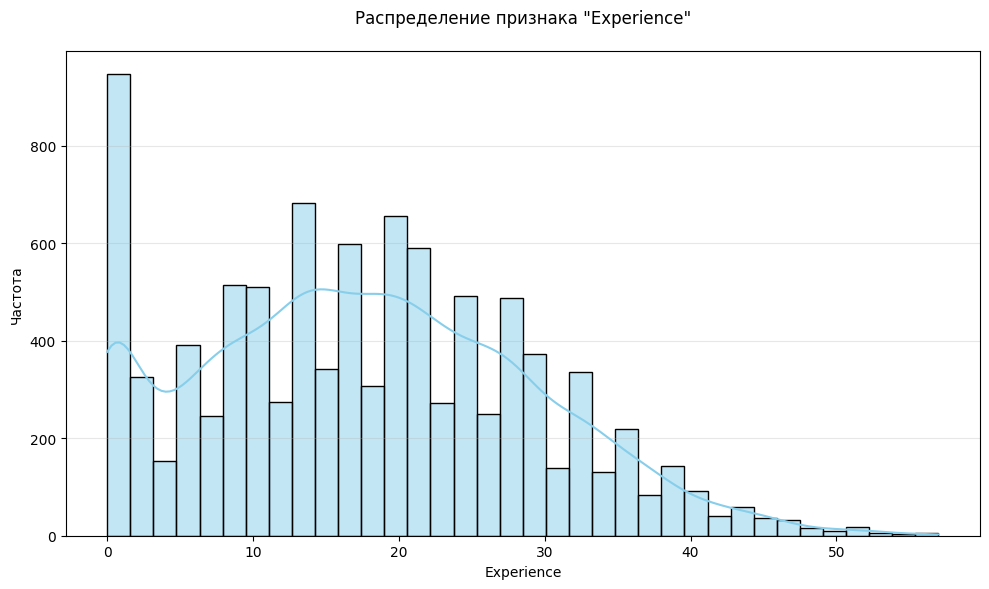

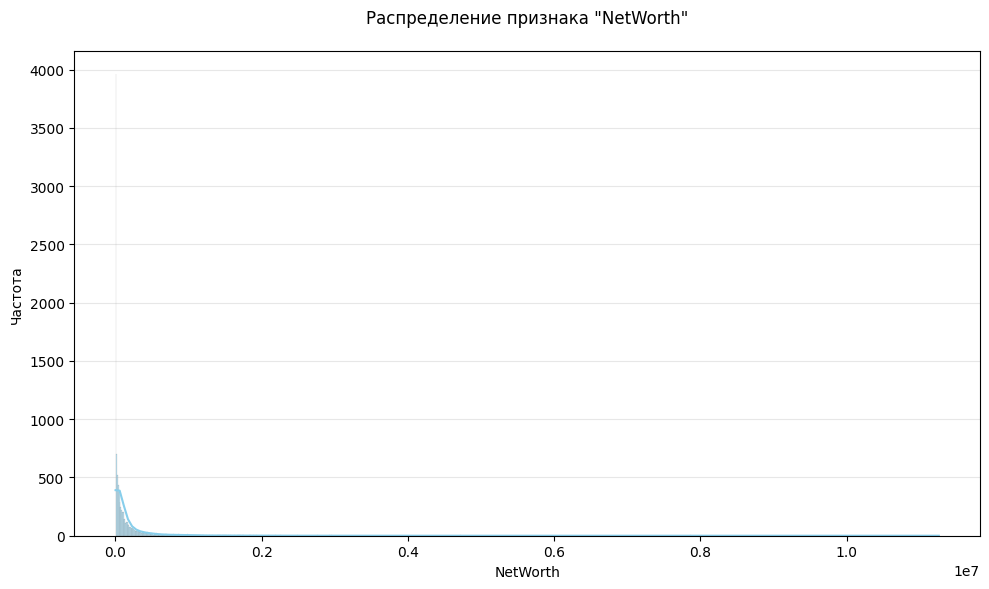

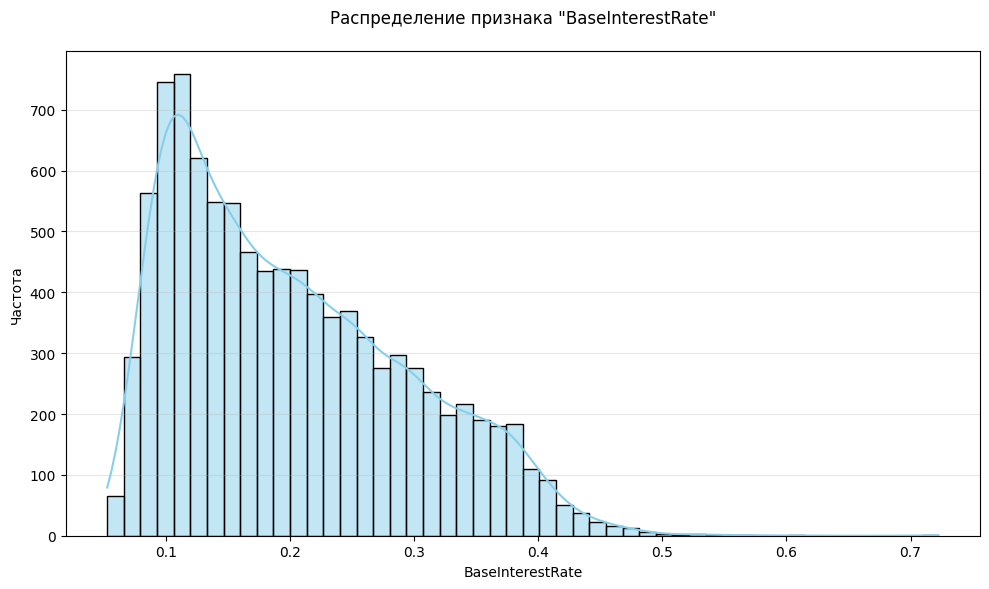

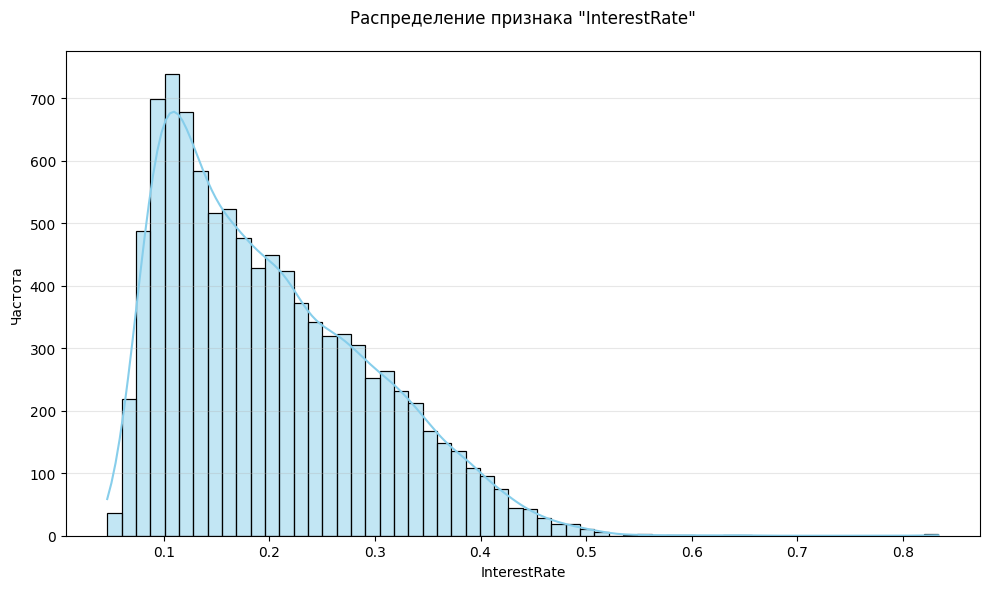

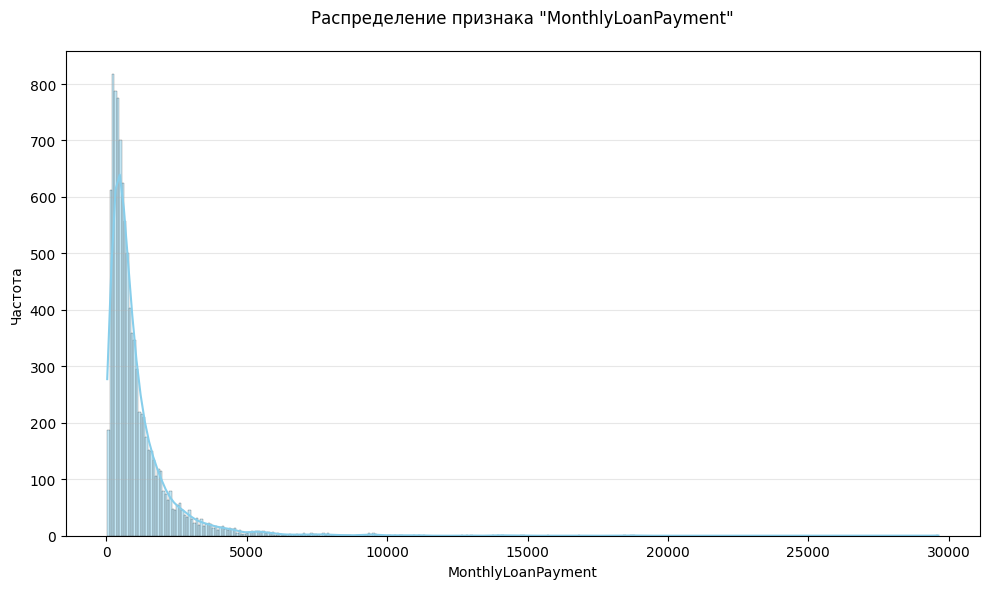

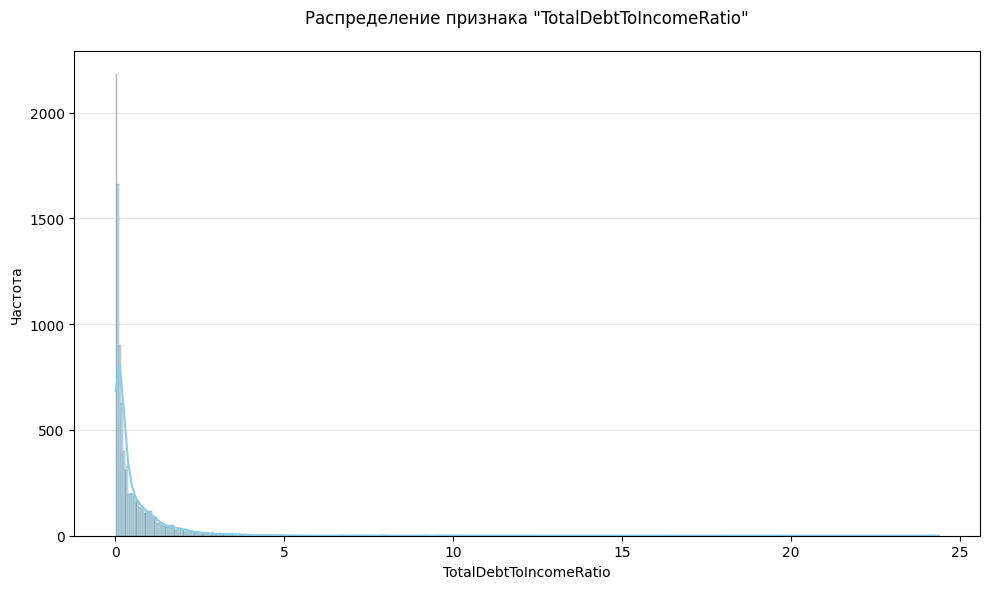

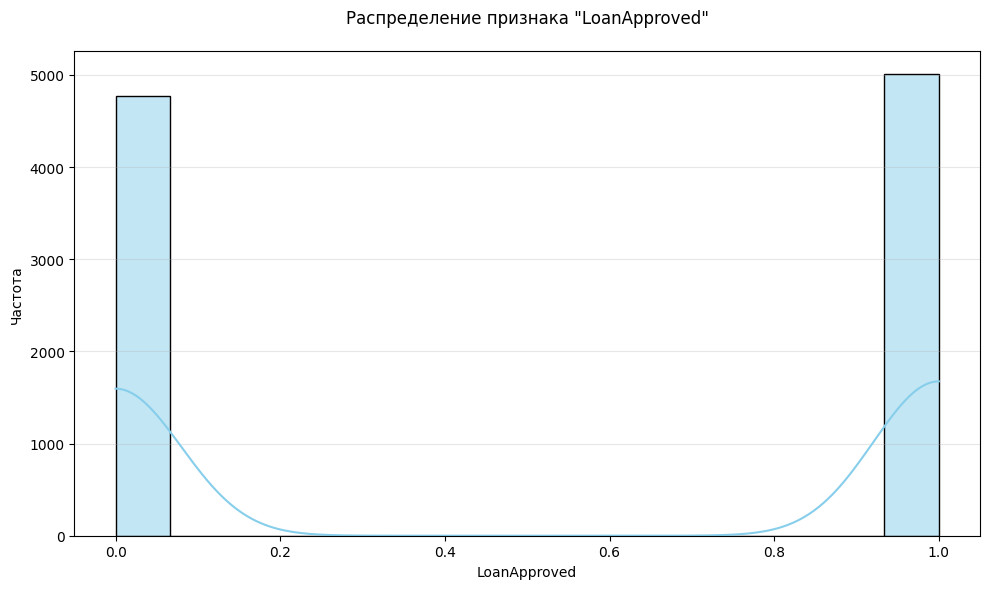

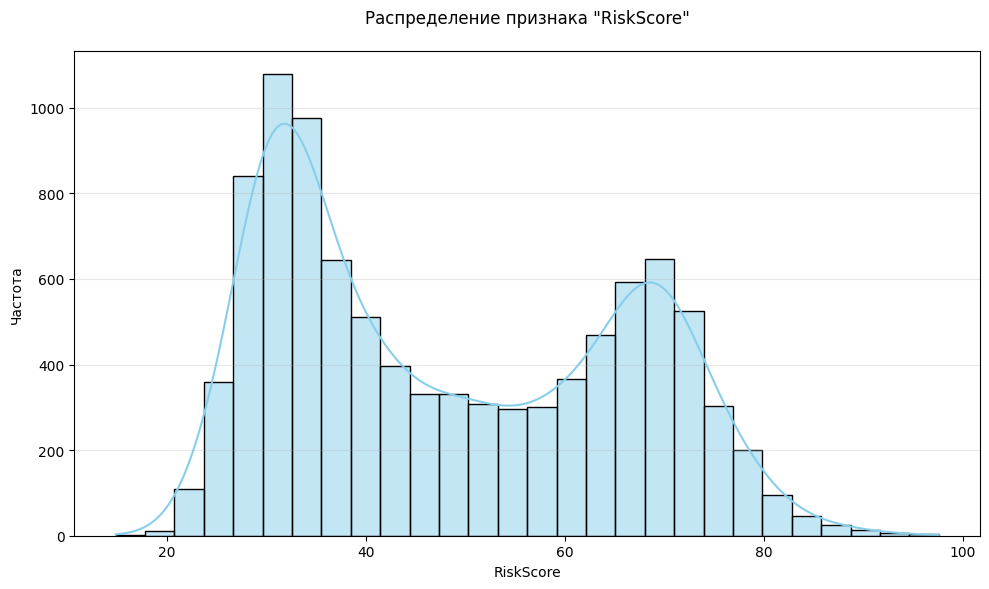

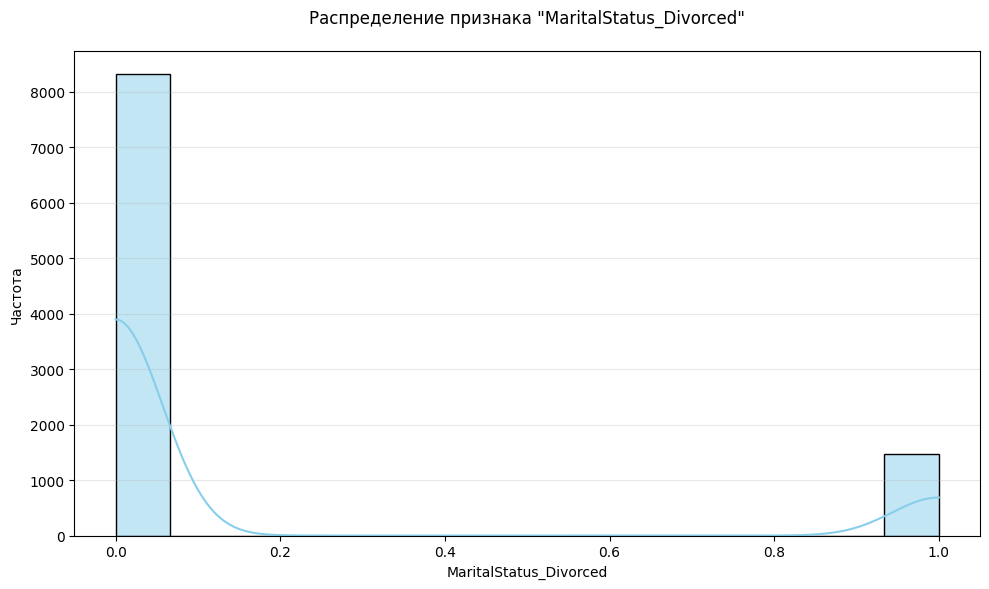

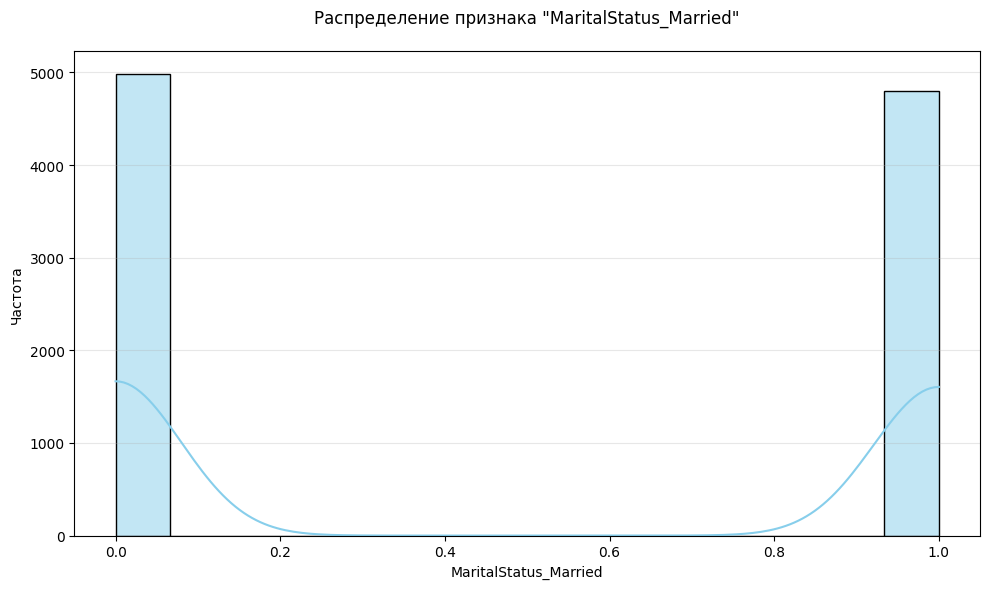

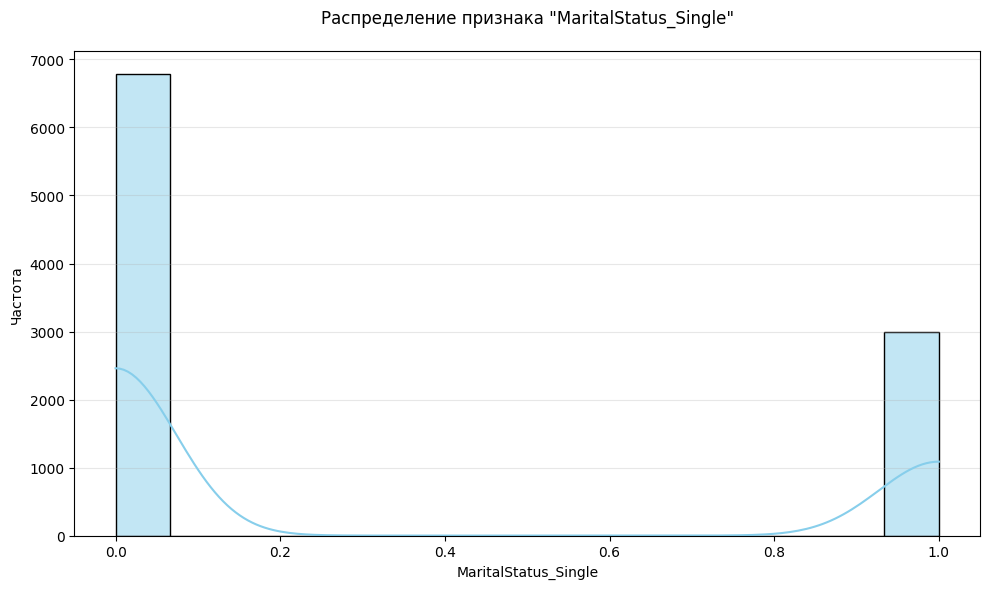

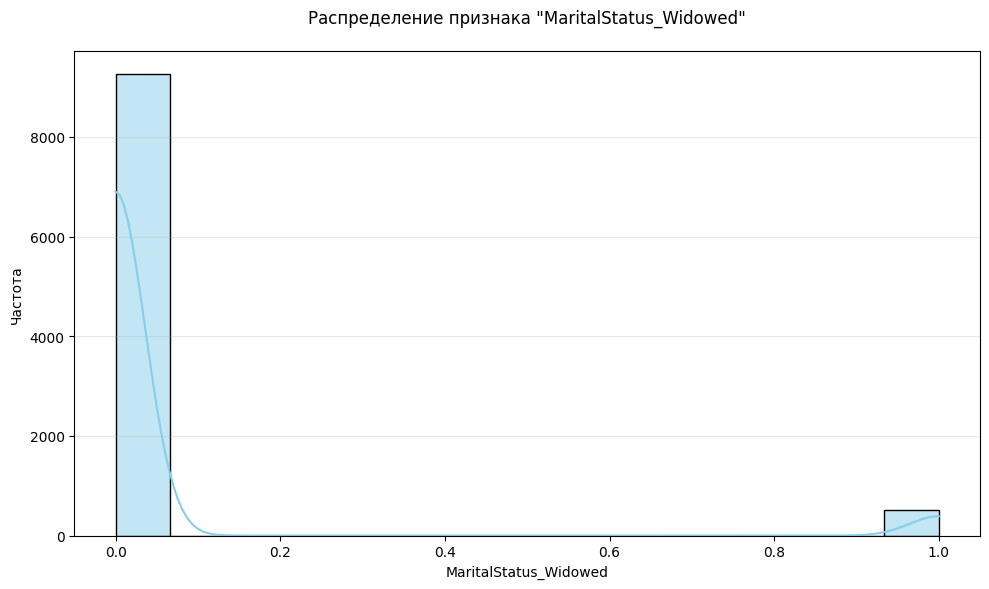

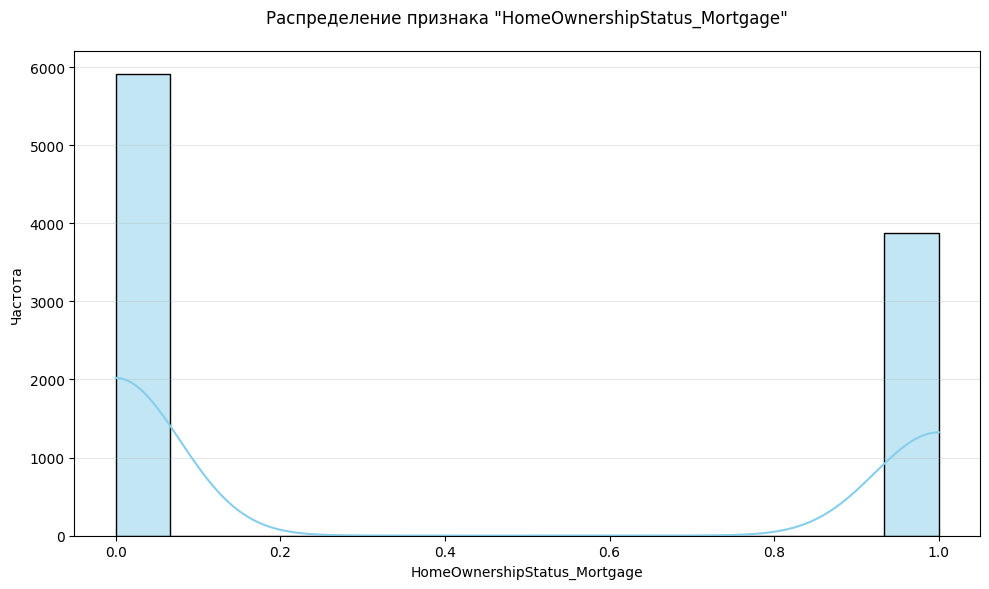

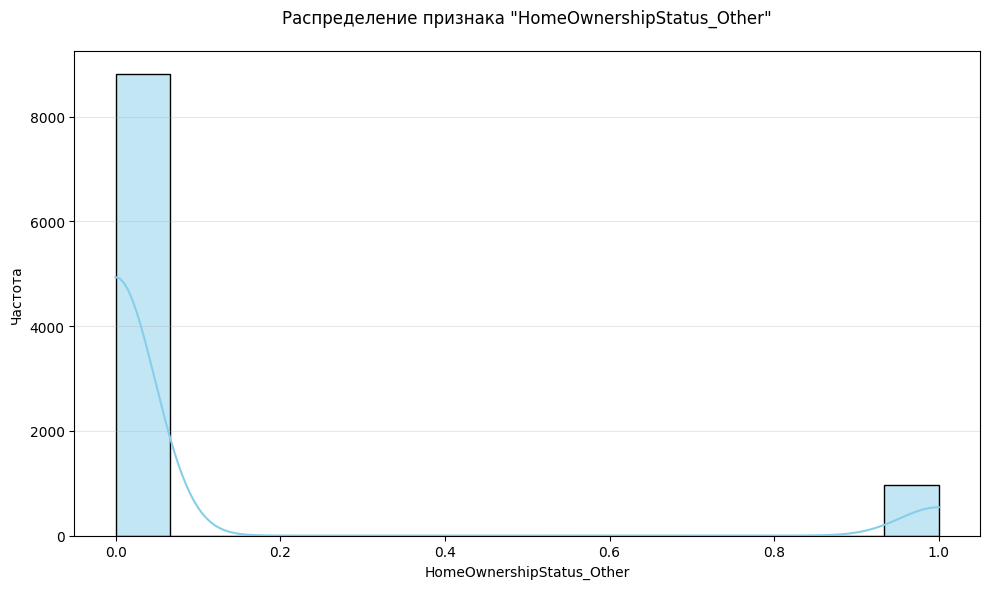

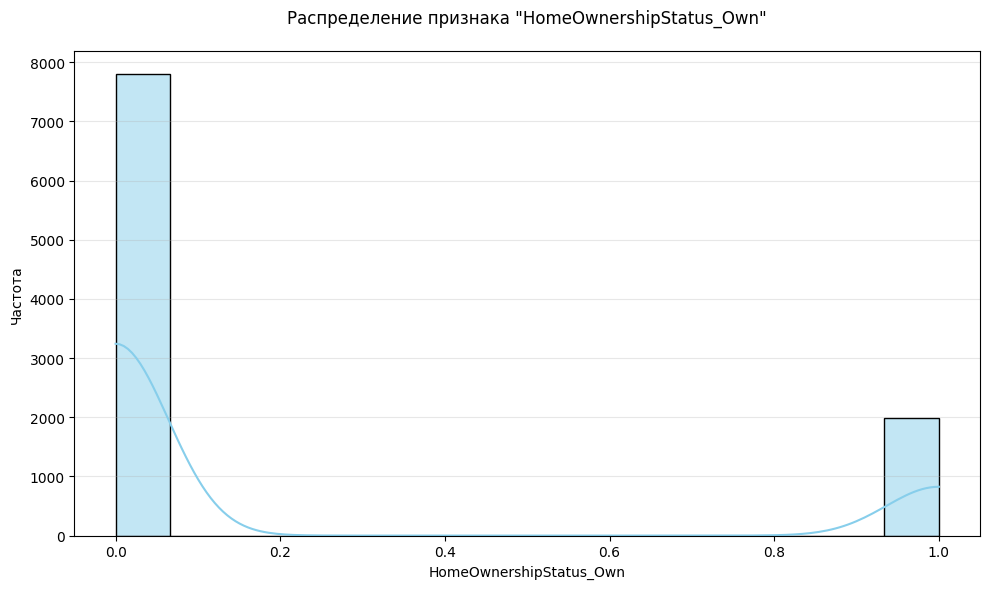

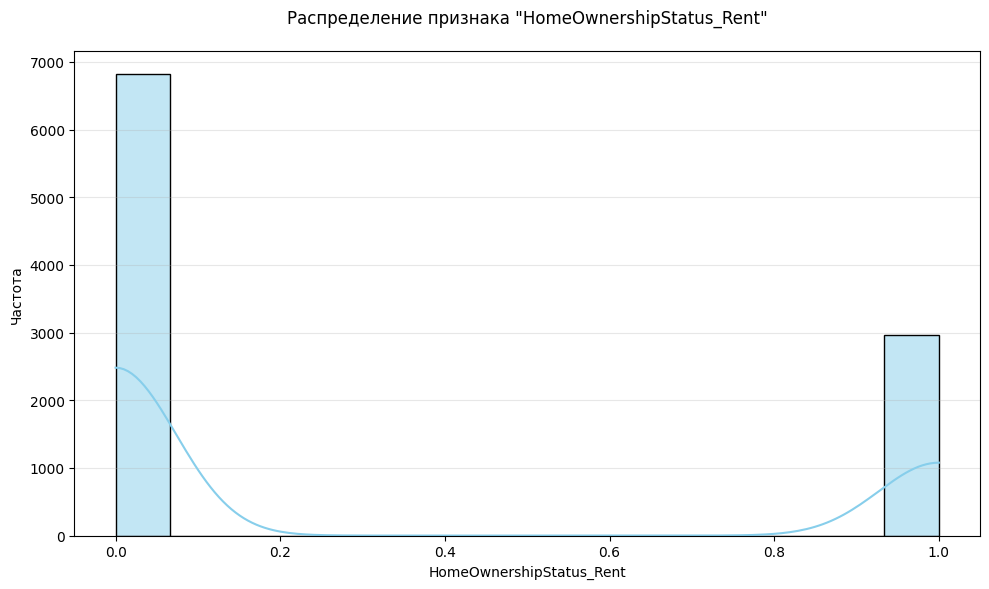

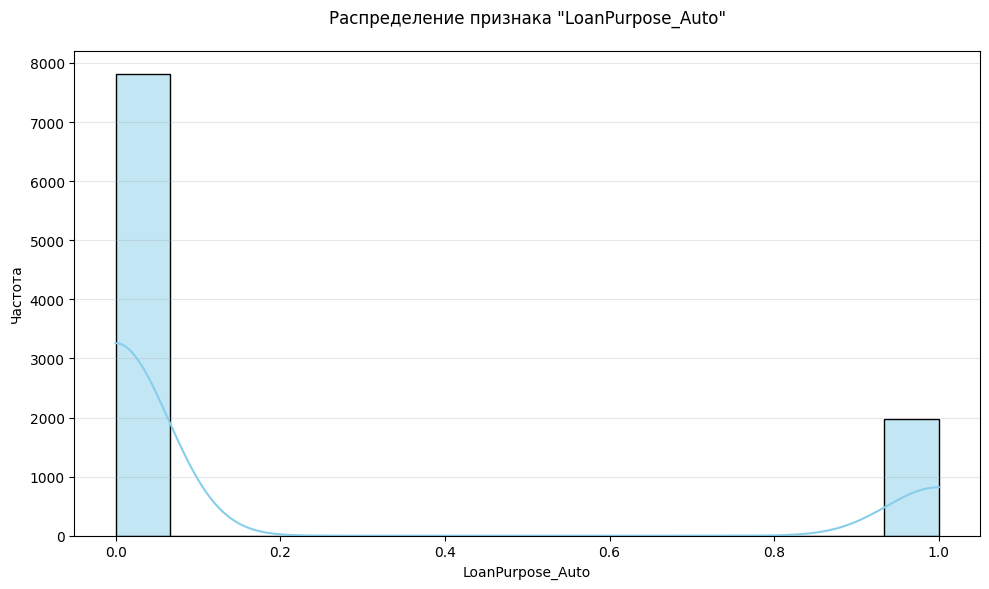

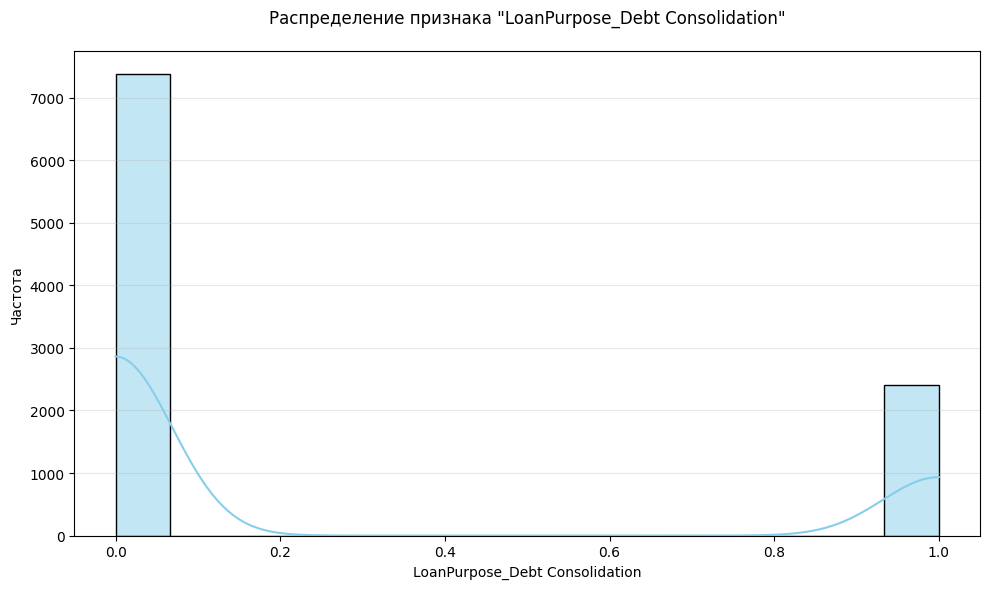

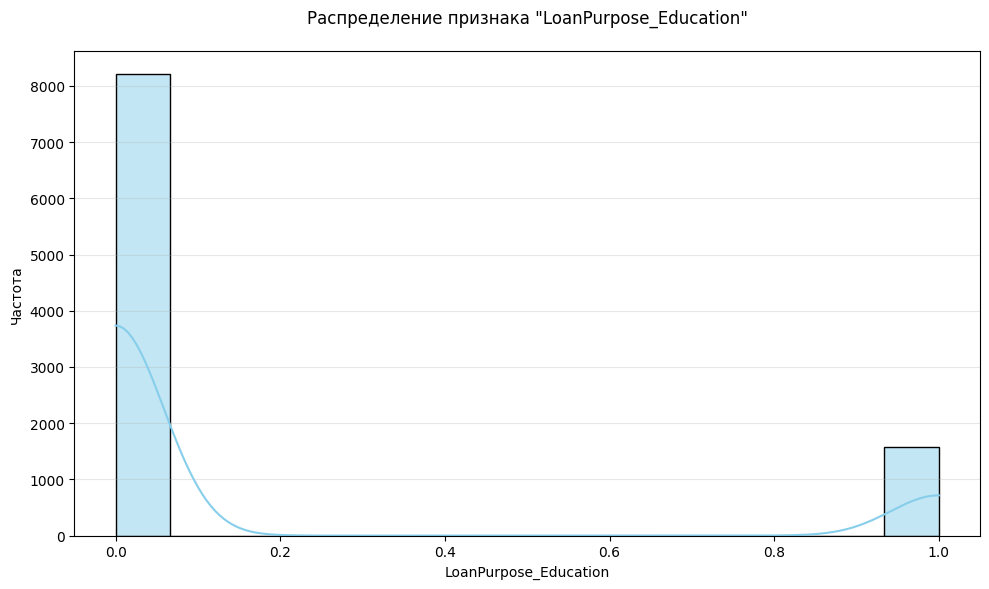

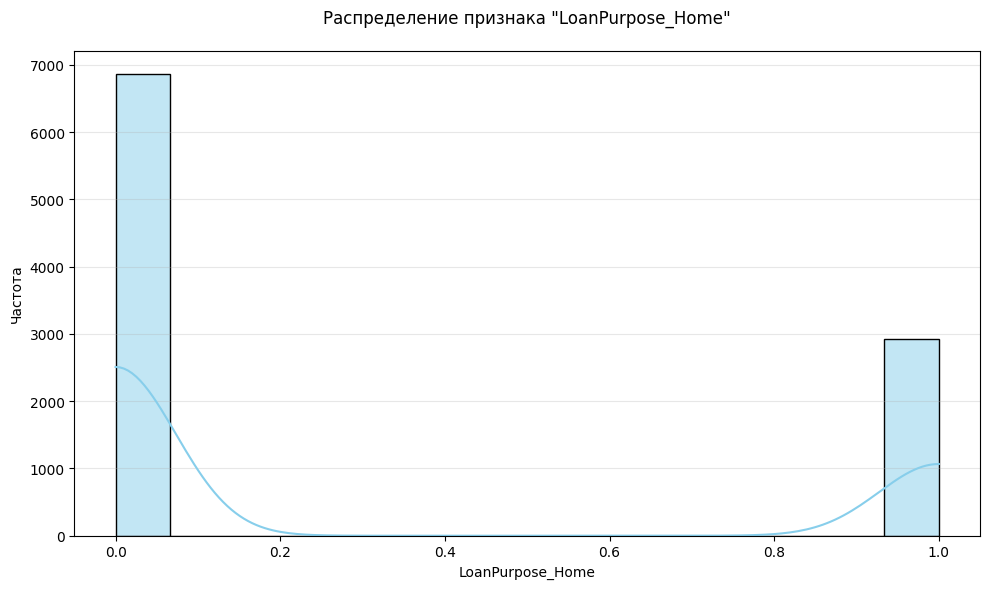

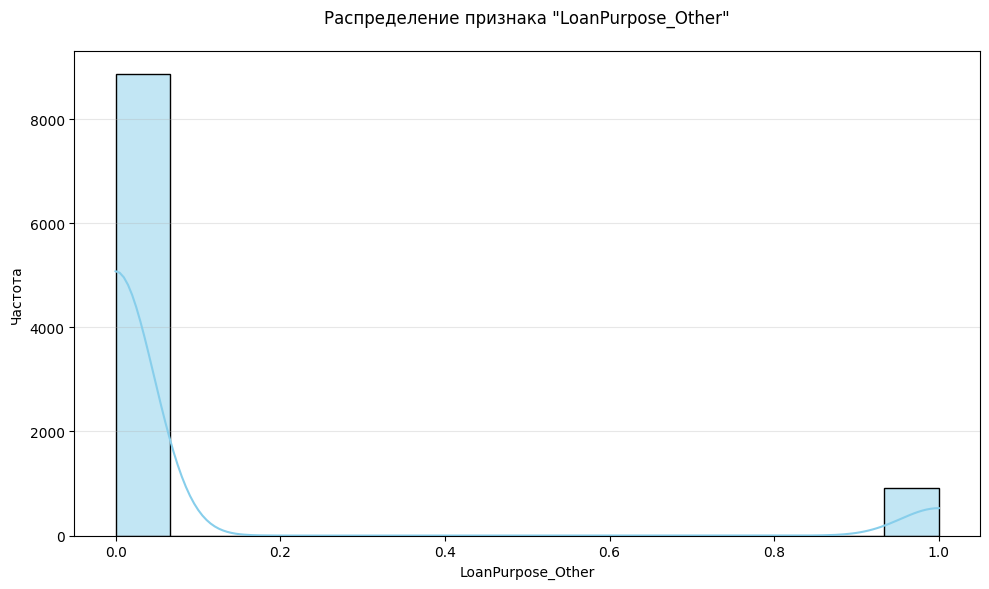

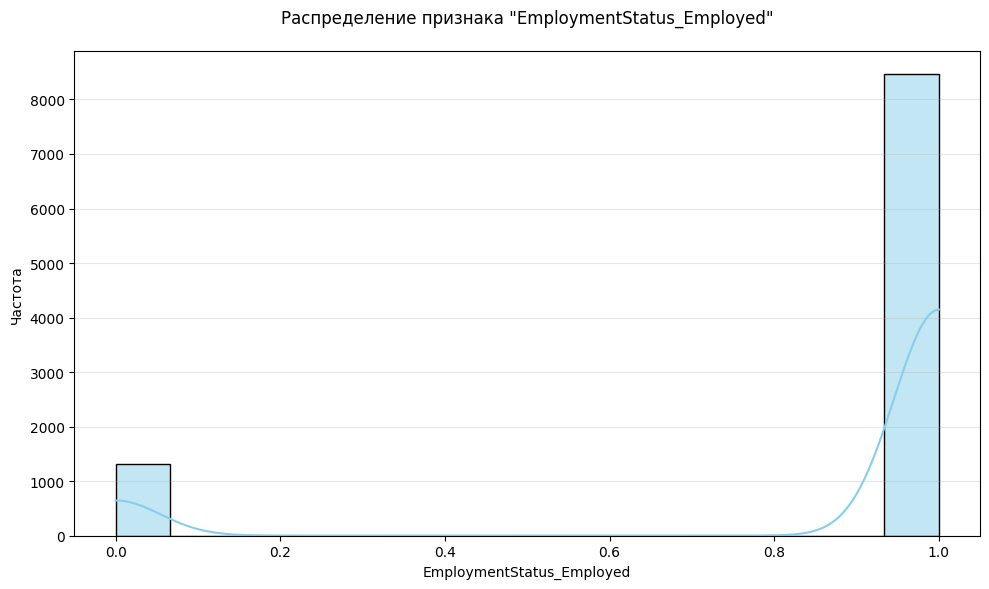

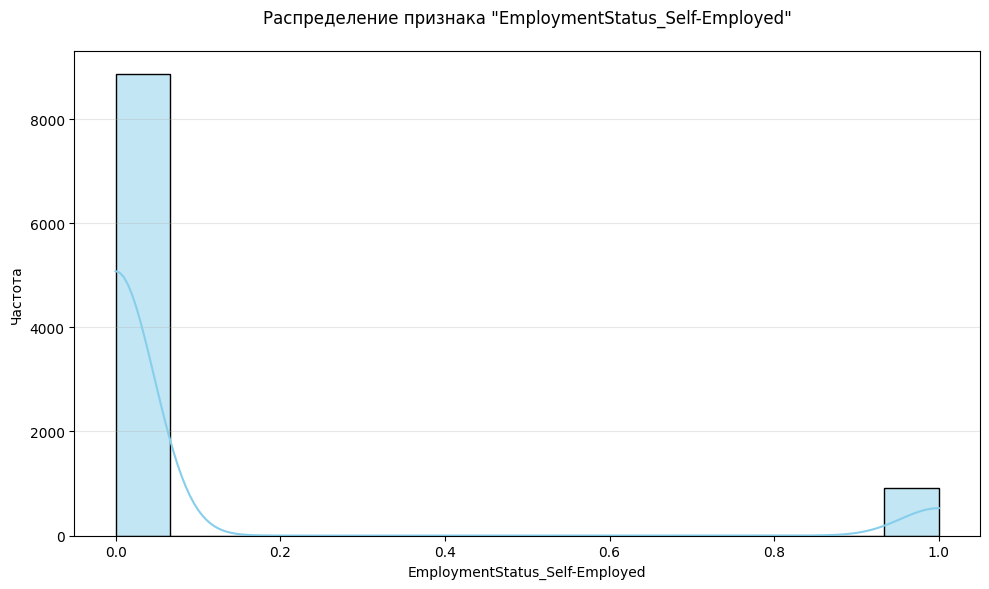

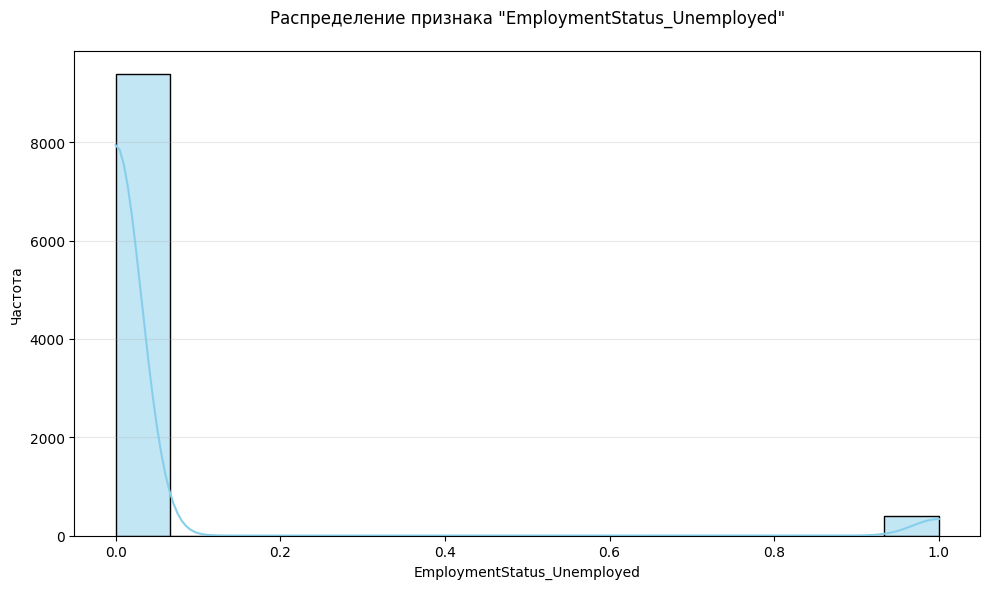

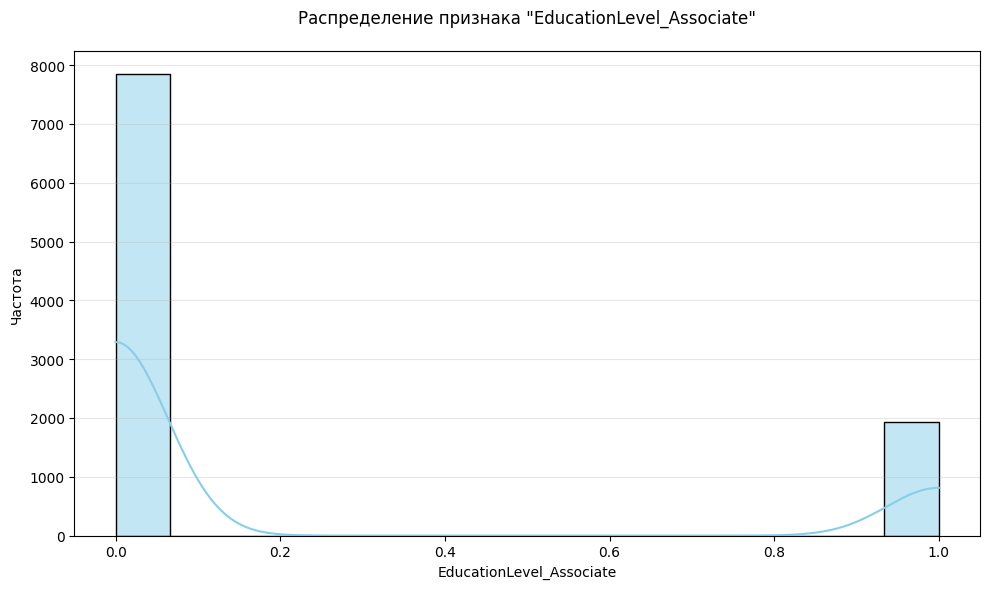

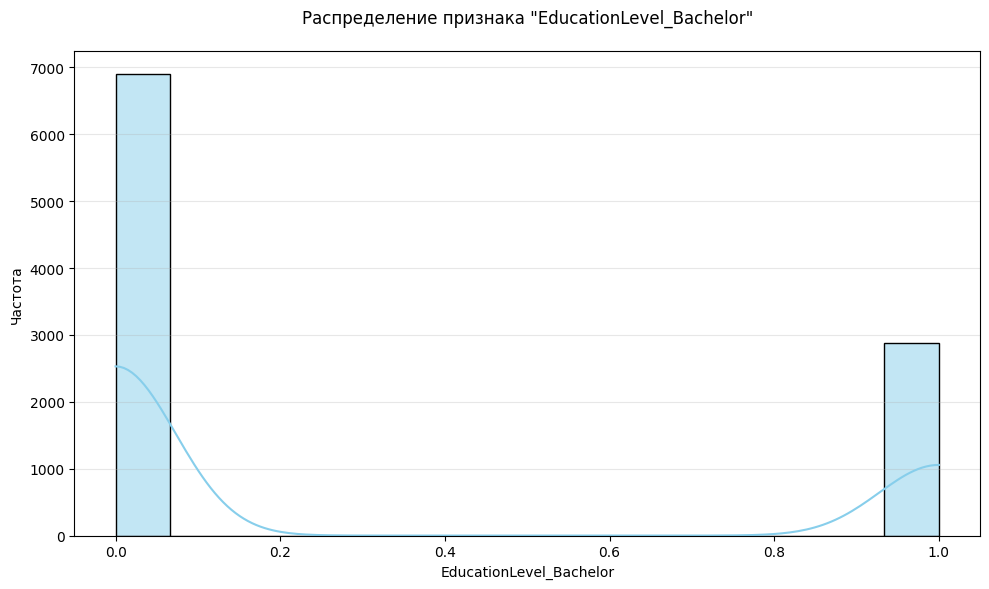

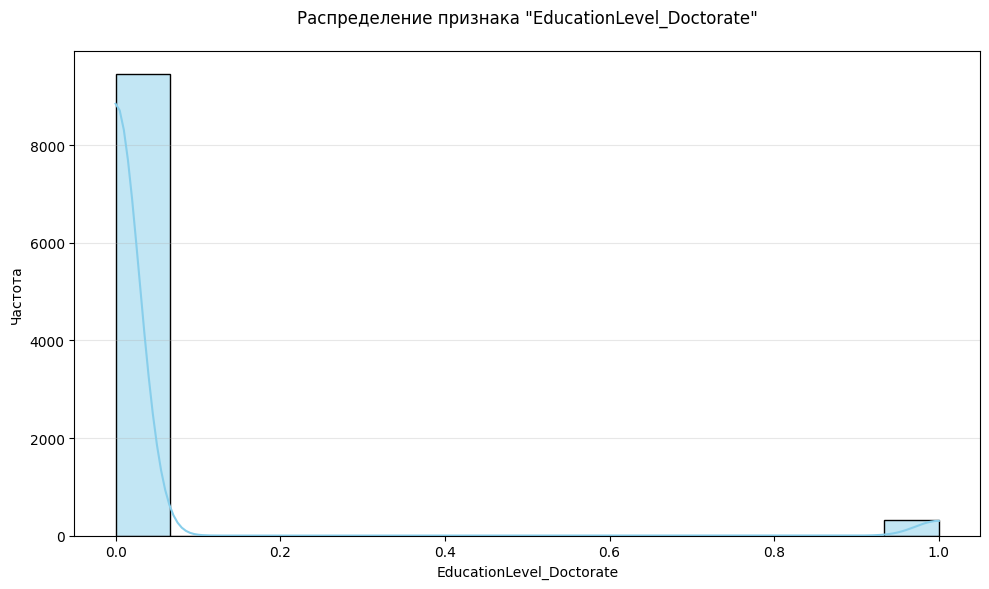

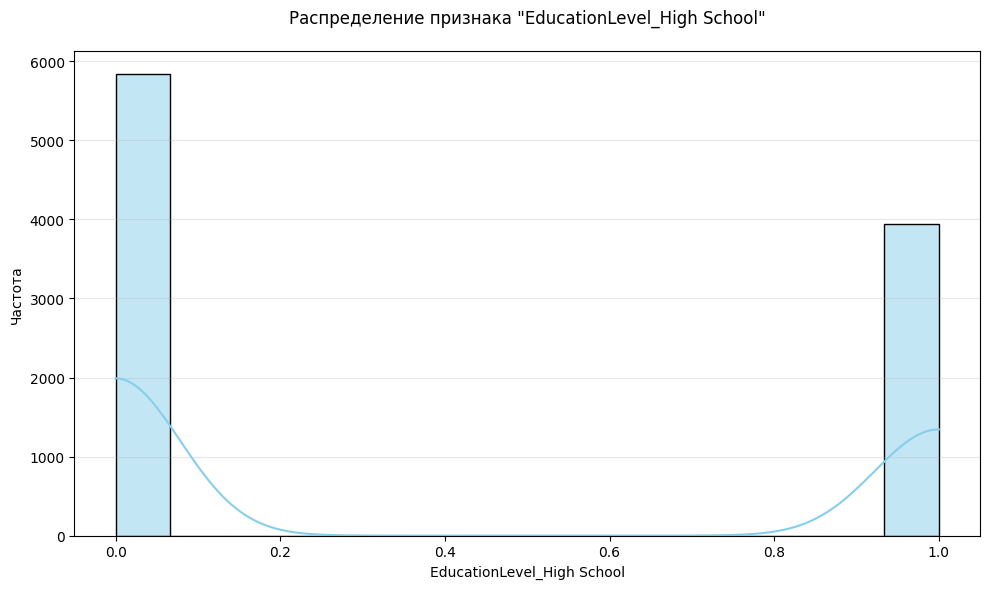

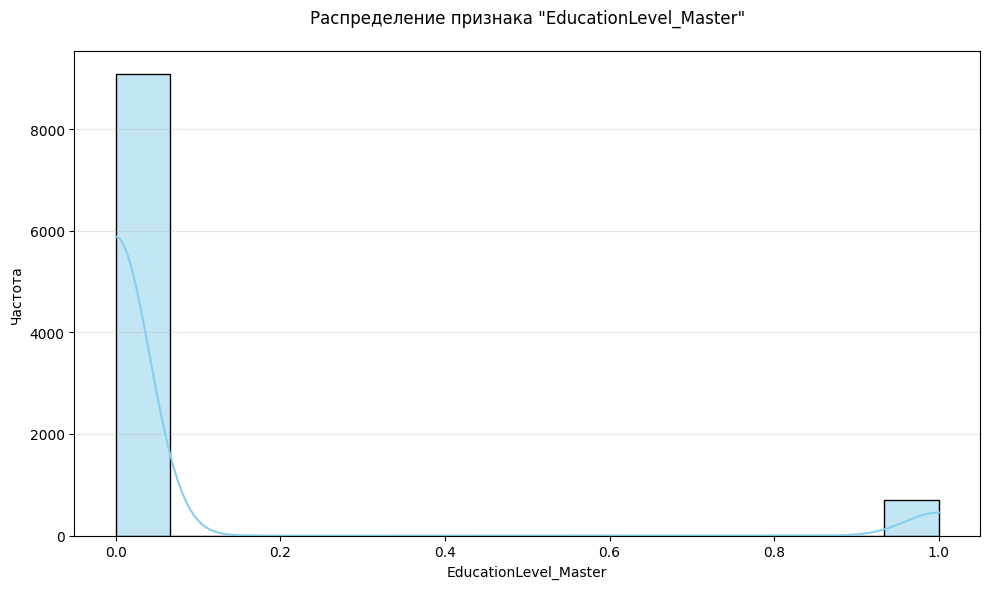

In [121]:
for feature in df.columns:
    plot_numeric_distribution(df, feature)

In [122]:
features_to_log = ['LoanAmount', 'MonthlyDebtPayments',
                   'CreditCardUtilizationRate', 'DebtToIncomeRatio',
                   'TotalAssets','TotalLiabilities', 'MonthlyLoanPayment',
                   'TotalDebtToIncomeRatio']

for feature in features_to_log:
    df[feature] = np.log(df[feature].replace(0, 1e-9))

In [123]:
from LinearRegression import LinearRegression
features_to_normalize = ['Age', 'AnnualIncome', 'CreditScore', 'LoanAmount', 'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments',
                         'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'PaymentHistory',
                         'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome',
                         'UtilityBillsPaymentHistory', 'JobTenure', 'Experience', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
                         'TotalDebtToIncomeRatio']
for feature in features_to_normalize:
    df[feature] = LinearRegression.Normalization.z_score(df[feature])

In [124]:
max_per_column = np.max(df, axis=0)
print(max_per_column)

Age                                 3.45525
AnnualIncome                       5.315901
CreditScore                        0.981315
LoanAmount                         3.744554
LoanDuration                       2.718333
NumberOfDependents                 3.128399
MonthlyDebtPayments                4.145902
CreditCardUtilizationRate          1.944029
NumberOfOpenCreditLines            5.153654
NumberOfCreditInquiries            5.091998
DebtToIncomeRatio                  2.044945
BankruptcyHistory                       1.0
PreviousLoanDefaults                    1.0
PaymentHistory                     4.122026
LengthOfCreditHistory              1.658255
SavingsAccountBalance             25.494553
CheckingAccountBalance            35.007666
TotalAssets                        3.698918
TotalLiabilities                   3.990131
MonthlyIncome                      1.507527
UtilityBillsPaymentHistory         1.722147
JobTenure                          5.477434
Experience                      

In [125]:
X = df.drop(columns=['RiskScore'])  # Все колонки, кроме целевой
y = df['RiskScore']

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [127]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
skmodel = Lasso(alpha=0.3)
skmodel.fit(X_train, y_train)
y_pred = skmodel.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"Коэффициенты модели: {skmodel.coef_}")

MSE: 22.653419549739773
Коэффициенты модели: [ 0.00000000e+00 -0.00000000e+00 -6.55960584e+00 -3.77465562e-01
  0.00000000e+00  0.00000000e+00 -5.30683028e-03  4.93607071e-01
  0.00000000e+00 -0.00000000e+00  1.53311565e+00  5.89660283e+00
  0.00000000e+00  0.00000000e+00 -4.88035394e-01  0.00000000e+00
  0.00000000e+00 -1.62543440e+00  8.38702354e-02 -1.47536284e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.12615389e-01
  0.00000000e+00  0.00000000e+00 -1.07907040e-01  1.54702466e+00
 -1.62908239e+01 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -1.09053094e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00]


In [128]:
coefs = skmodel.coef_
feature_names = X.columns
important_features = feature_names[coefs != 0]
important_features

Index(['CreditScore', 'LoanAmount', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LengthOfCreditHistory', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'NetWorth', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'EmploymentStatus_Employed'],
      dtype='object')

In [129]:
X = df[important_features]

In [130]:
max_per_column = np.max(X, axis=0)
print(max_per_column)

CreditScore                   0.981315
LoanAmount                    3.744554
MonthlyDebtPayments           4.145902
CreditCardUtilizationRate     1.944029
DebtToIncomeRatio             2.044945
BankruptcyHistory                  1.0
LengthOfCreditHistory         1.658255
TotalAssets                   3.698918
TotalLiabilities              3.990131
MonthlyIncome                 1.507527
NetWorth                     24.074957
MonthlyLoanPayment            4.113136
TotalDebtToIncomeRatio        3.434721
LoanApproved                       1.0
EmploymentStatus_Employed         True
dtype: object


In [131]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
df_poly = poly.fit_transform(X)

print(f"Количество признаков до полиномизации: {X.shape[1]}")
print(f"Количество признаков после полиномизации: {df_poly.shape[1]}")

Количество признаков до полиномизации: 15
Количество признаков после полиномизации: 135


In [132]:
X_train, X_test, y_train, y_test = train_test_split(df_poly, y, test_size=0.2, random_state=42)

In [133]:
model = LinearRegression.LRAnalytical(reg="l2", alpha=1)

model.fit(X_train, y_train)
LinearRegression.LossAndDerivatives.mse(X_test, y_test, model.weights, model.bias)

np.float64(10.810424801807324)

In [134]:
df_test = pd.read_csv('test.csv')
df_test = df_test.drop('ApplicationDate', axis=1)
df_test = pd.get_dummies(df_test, columns=cat_cols, prefix=cat_cols)
for feature in features_to_log:
    df_test[feature] = np.log(df_test[feature].replace(0, 1e-9))
for feature in features_to_normalize:
    df_test[feature] = LinearRegression.Normalization.z_score(df_test[feature])

X_test = df_test[important_features]
poly = PolynomialFeatures(degree=2, include_bias=False)
test_poly = poly.fit_transform(X)

In [135]:
prediction = model.predict(test_poly)
df_prediction = pd.DataFrame(prediction, columns=['RiskScore'])
df_prediction = df_prediction.reset_index()
df_prediction.rename(columns={'index': 'ID'}, inplace=True)
df_prediction.to_csv('submission.csv', index=False)
df_prediction

ID  RiskScore
0        0  63.110243
1        1  27.519389
2        2  35.769351
3        3  37.991865
4        4  29.972184
...    ...        ...
9782  9782  39.037078
9783  9783  30.073610
9784  9784  30.470653
9785  9785  71.049907
9786  9786  74.017185

[9787 rows x 2 columns]